## Import the first forex EUR/USD dataset

In [419]:
!pip install nbeats-keras
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv('/content/FX_IDC_EURUSD, 60.csv')
df.tail()



,time,open,high,low,close,Volume,Short MA,Long MA,Cross,Histogram,...,%K,%D,RSI,RSI-based MA,Upper Bollinger Band,Lower Bollinger Band,Regular Bullish,Regular Bullish Label,Regular Bearish,Regular Bearish Label
3330,2024-04-30T03:00:00Z,1.07066,1.07074,1.07018,1.07054,23180,1.071388,1.071404,1.071388,-0.000158,...,23.101266,35.670719,42.963763,50.896704,NaN,NaN,NaN,NaN,NaN,NaN
3331,2024-04-30T04:00:00Z,1.07052,1.07060,1.07015,1.07048,19019,1.071216,1.071345,NaN,-0.000171,...,11.702128,25.545026,42.517085,50.304863,NaN,NaN,NaN,NaN,NaN,NaN
3332,2024-04-30T05:00:00Z,1.07055,1.07070,1.06944,1.06989,27250,1.070978,1.071318,NaN,-0.000207,...,12.747875,15.850423,38.300315,49.277859,NaN,NaN,NaN,NaN,NaN,NaN
3333,2024-04-30T06:00:00Z,1.06993,1.07062,1.06891,1.07047,53115,1.070804,1.071270,NaN,-0.000182,...,38.423645,20.957883,44.163032,48.345503,NaN,NaN,NaN,NaN,NaN,NaN
3334,2024-04-30T07:00:00Z,1.07040,1.07098,1.07010,1.07077,34531,1.070707,1.071226,NaN,-0.000137,...,51.381215,34.184245,46.969866,47.783270,NaN,NaN,NaN,NaN,NaN,NaN


## Clean and Visualize and Engineer new Features!

In [207]:

print(df.columns)

Index(['time', 'open', 'high', 'low', 'close', 'Volume', 'Short MA', 'Long MA',
       'Cross', 'Histogram', 'MACD', 'Signal', '%K', '%D', 'RSI',
       'RSI-based MA', 'Upper Bollinger Band', 'Lower Bollinger Band',
       'Regular Bullish', 'Regular Bullish Label', 'Regular Bearish',
       'Regular Bearish Label'],
      dtype='object')


In [208]:
df.tail()

,time,open,high,low,close,Volume,Short MA,Long MA,Cross,Histogram,...,%K,%D,RSI,RSI-based MA,Upper Bollinger Band,Lower Bollinger Band,Regular Bullish,Regular Bullish Label,Regular Bearish,Regular Bearish Label
3330,2024-04-30T03:00:00Z,1.07066,1.07074,1.07018,1.07054,23180,1.071388,1.071404,1.071388,-0.000158,...,23.101266,35.670719,42.963763,50.896704,NaN,NaN,NaN,NaN,NaN,NaN
3331,2024-04-30T04:00:00Z,1.07052,1.07060,1.07015,1.07048,19019,1.071216,1.071345,NaN,-0.000171,...,11.702128,25.545026,42.517085,50.304863,NaN,NaN,NaN,NaN,NaN,NaN
3332,2024-04-30T05:00:00Z,1.07055,1.07070,1.06944,1.06989,27250,1.070978,1.071318,NaN,-0.000207,...,12.747875,15.850423,38.300315,49.277859,NaN,NaN,NaN,NaN,NaN,NaN
3333,2024-04-30T06:00:00Z,1.06993,1.07062,1.06891,1.07047,53115,1.070804,1.071270,NaN,-0.000182,...,38.423645,20.957883,44.163032,48.345503,NaN,NaN,NaN,NaN,NaN,NaN
3334,2024-04-30T07:00:00Z,1.07040,1.07098,1.07010,1.07077,34531,1.070707,1.071226,NaN,-0.000137,...,51.381215,34.184245,46.969866,47.783270,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
df_mod = df.iloc[:,:-6]
df_mod.head()

,time,open,high,low,close,Volume,Short MA,Long MA,Cross,Histogram,MACD,Signal,%K,%D,RSI,RSI-based MA
0,2023-10-16T23:00:00Z,1.05558,1.05574,1.05521,1.05543,19739,1.055452,1.054276,NaN,0.000164,0.000743,0.000579,77.631579,82.390515,58.200137,58.373937
1,2023-10-17T00:00:00Z,1.05539,1.05608,1.05535,1.05556,39636,1.055582,1.054429,NaN,0.000117,0.000725,0.000608,81.052632,79.649123,58.987308,58.864663
2,2023-10-17T01:00:00Z,1.05557,1.05560,1.05487,1.05522,41994,1.055644,1.054557,NaN,0.000055,0.000677,0.000622,72.105263,76.929825,56.016135,58.959980
3,2023-10-17T02:00:00Z,1.05525,1.05529,1.05454,1.05492,34553,1.055578,1.054654,NaN,-0.000012,0.000607,0.000619,64.210526,72.456140,53.457518,58.646747
4,2023-10-17T03:00:00Z,1.05500,1.05542,1.05472,1.05498,33355,1.055531,1.054726,NaN,-0.000055,0.000550,0.000605,65.789474,67.368421,53.910942,58.967613


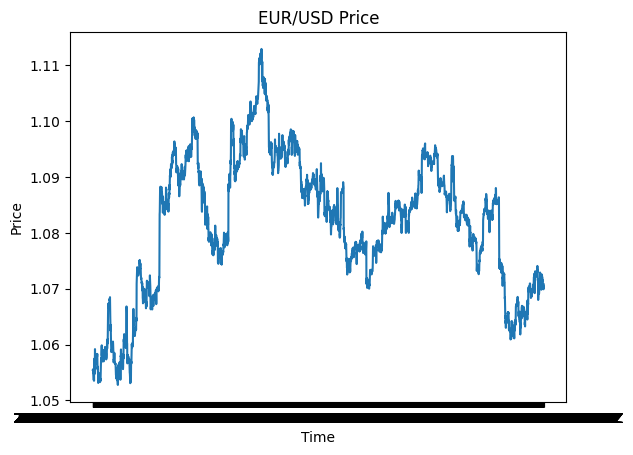

In [210]:
import matplotlib.pyplot as plt

plt.plot(df_mod['time'], df_mod['close'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('EUR/USD Price')
plt.show()



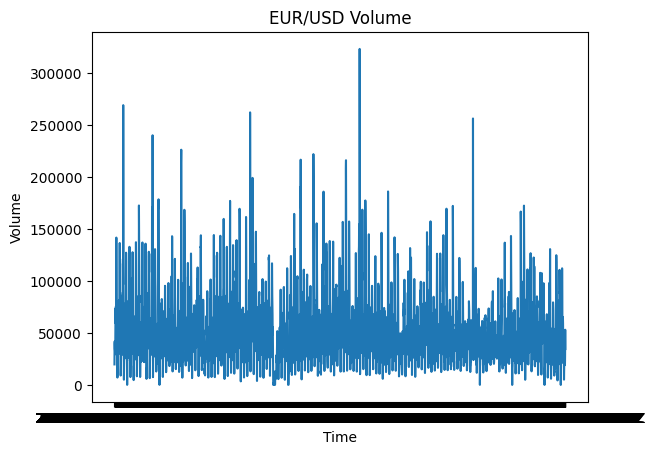

In [211]:
#plot the volume over time
plt.plot(df_mod['time'], df_mod['Volume'])
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('EUR/USD Volume')
plt.show()


In [212]:
cols_with_nas = df_mod.columns[df_mod.isna().any()].tolist()
na_counts = df_mod.isna().sum()  # Count NAs in each column
print(na_counts)

time               0
open               0
high               0
low                0
close              0
Volume             0
Short MA           0
Long MA            0
Cross           3160
Histogram          0
MACD               0
Signal             0
%K                 0
%D                 0
RSI                0
RSI-based MA       0
dtype: int64


In [213]:
df_mod = df_mod.drop('Cross', axis=1)
df_mod.columns



Index(['time', 'open', 'high', 'low', 'close', 'Volume', 'Short MA', 'Long MA',
       'Histogram', 'MACD', 'Signal', '%K', '%D', 'RSI', 'RSI-based MA'],
      dtype='object')

In [214]:
df_mod['Volume_Change'] = df_mod['Volume'].diff()
df_mod['Open_change'] = df_mod['open'].diff()
df_mod['High_change'] = df_mod['high'].diff()
df_mod['Low_change'] = df_mod['low'].diff()
df_mod['Close_change'] = df_mod['close'].diff()

df_mod.tail()


,time,open,high,low,close,Volume,Short MA,Long MA,Histogram,MACD,Signal,%K,%D,RSI,RSI-based MA,Volume_Change,Open_change,High_change,Low_change,Close_change
3330,2024-04-30T03:00:00Z,1.07066,1.07074,1.07018,1.07054,23180,1.071388,1.071404,-0.000158,-0.000089,0.000069,23.101266,35.670719,42.963763,50.896704,-3215.0,0.00000,-0.00001,-0.00005,-0.00008
3331,2024-04-30T04:00:00Z,1.07052,1.07060,1.07015,1.07048,19019,1.071216,1.071345,-0.000171,-0.000144,0.000026,11.702128,25.545026,42.517085,50.304863,-4161.0,-0.00014,-0.00014,-0.00003,-0.00006
3332,2024-04-30T05:00:00Z,1.07055,1.07070,1.06944,1.06989,27250,1.070978,1.071318,-0.000207,-0.000233,-0.000026,12.747875,15.850423,38.300315,49.277859,8231.0,0.00003,0.00010,-0.00071,-0.00059
3333,2024-04-30T06:00:00Z,1.06993,1.07062,1.06891,1.07047,53115,1.070804,1.071270,-0.000182,-0.000254,-0.000071,38.423645,20.957883,44.163032,48.345503,25865.0,-0.00062,-0.00008,-0.00053,0.00058
3334,2024-04-30T07:00:00Z,1.07040,1.07098,1.07010,1.07077,34531,1.070707,1.071226,-0.000137,-0.000243,-0.000106,51.381215,34.184245,46.969866,47.783270,-18584.0,0.00047,0.00036,0.00119,0.00030


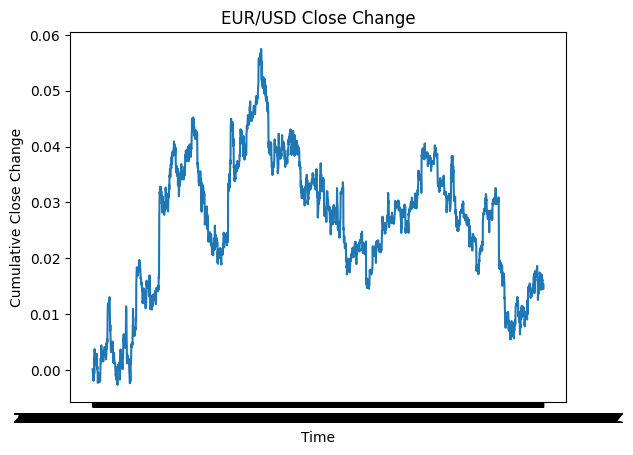

In [215]:
close_changed = pd.Series(df_mod['Close_change'].cumsum())
close_changed.head()

plt.plot(df_mod['time'], close_changed)
plt.xlabel('Time')
plt.ylabel('Cumulative Close Change')
plt.title('EUR/USD Close Change')
plt.show()



In [216]:
df_mod['time'][0:5]

0    2023-10-16T23:00:00Z
1    2023-10-17T00:00:00Z
2    2023-10-17T01:00:00Z
3    2023-10-17T02:00:00Z
4    2023-10-17T03:00:00Z
Name: time, dtype: object

In [217]:
print(list(df_mod.time))

['2023-10-16T23:00:00Z', '2023-10-17T00:00:00Z', '2023-10-17T01:00:00Z', '2023-10-17T02:00:00Z', '2023-10-17T03:00:00Z', '2023-10-17T04:00:00Z', '2023-10-17T05:00:00Z', '2023-10-17T06:00:00Z', '2023-10-17T07:00:00Z', '2023-10-17T08:00:00Z', '2023-10-17T09:00:00Z', '2023-10-17T10:00:00Z', '2023-10-17T11:00:00Z', '2023-10-17T12:00:00Z', '2023-10-17T13:00:00Z', '2023-10-17T14:00:00Z', '2023-10-17T15:00:00Z', '2023-10-17T16:00:00Z', '2023-10-17T17:00:00Z', '2023-10-17T18:00:00Z', '2023-10-17T19:00:00Z', '2023-10-17T20:00:00Z', '2023-10-17T21:00:00Z', '2023-10-17T22:00:00Z', '2023-10-17T23:00:00Z', '2023-10-18T00:00:00Z', '2023-10-18T01:00:00Z', '2023-10-18T02:00:00Z', '2023-10-18T03:00:00Z', '2023-10-18T04:00:00Z', '2023-10-18T05:00:00Z', '2023-10-18T06:00:00Z', '2023-10-18T07:00:00Z', '2023-10-18T08:00:00Z', '2023-10-18T09:00:00Z', '2023-10-18T10:00:00Z', '2023-10-18T11:00:00Z', '2023-10-18T12:00:00Z', '2023-10-18T13:00:00Z', '2023-10-18T14:00:00Z', '2023-10-18T15:00:00Z', '2023-10-18T16:

In [218]:
df_mod['time'] = pd.to_datetime(df_mod['time'])
df_mod.head()

,time,open,high,low,close,Volume,Short MA,Long MA,Histogram,MACD,Signal,%K,%D,RSI,RSI-based MA,Volume_Change,Open_change,High_change,Low_change,Close_change
0,2023-10-16 23:00:00+00:00,1.05558,1.05574,1.05521,1.05543,19739,1.055452,1.054276,0.000164,0.000743,0.000579,77.631579,82.390515,58.200137,58.373937,NaN,NaN,NaN,NaN,NaN
1,2023-10-17 00:00:00+00:00,1.05539,1.05608,1.05535,1.05556,39636,1.055582,1.054429,0.000117,0.000725,0.000608,81.052632,79.649123,58.987308,58.864663,19897.0,-0.00019,0.00034,0.00014,0.00013
2,2023-10-17 01:00:00+00:00,1.05557,1.05560,1.05487,1.05522,41994,1.055644,1.054557,0.000055,0.000677,0.000622,72.105263,76.929825,56.016135,58.959980,2358.0,0.00018,-0.00048,-0.00048,-0.00034
3,2023-10-17 02:00:00+00:00,1.05525,1.05529,1.05454,1.05492,34553,1.055578,1.054654,-0.000012,0.000607,0.000619,64.210526,72.456140,53.457518,58.646747,-7441.0,-0.00032,-0.00031,-0.00033,-0.00030
4,2023-10-17 03:00:00+00:00,1.05500,1.05542,1.05472,1.05498,33355,1.055531,1.054726,-0.000055,0.000550,0.000605,65.789474,67.368421,53.910942,58.967613,-1198.0,-0.00025,0.00013,0.00018,0.00006


In [219]:
df_mod['Price_Move'] = abs(df_mod['close'] - df_mod['open'])
df_mod['Volume_Move'] = df_mod['Volume'] - df_mod['Volume'].shift(1)
df_mod['Cumulative_Volume_Move'] = df_mod['Volume_Move'].cumsum()
df_mod['Price_Range'] = df_mod['high'] - df_mod['low']
df_mod['Relative_Percent_Close'] = ((df_mod['close'] - df_mod['open']) / df_mod['open']) * 100
df_mod['Absolute_Percent_Close'] = (df_mod['close'] - df_mod['open']/df_mod['Price_Range'])*100
df_mod['Absolute_Percent_Volume'] = ((df_mod['Volume'] - df_mod['Volume'].shift(1)) / df_mod['Volume'].shift(1)) * 100
df_mod['Relative_Strength'] = abs((df_mod['high']-df_mod['close'])/(df_mod['high']-df_mod['low']))
df_mod['Momentum'] = abs(df_mod['close']-df_mod['close'].shift(1))
df_mod['Momentum %'] = abs((df_mod['Momentum']/df_mod['close'].shift(1))*100)

df_mod.head()


,time,open,high,low,close,Volume,Short MA,Long MA,Histogram,MACD,...,Price_Move,Volume_Move,Cumulative_Volume_Move,Price_Range,Relative_Percent_Close,Absolute_Percent_Close,Absolute_Percent_Volume,Relative_Strength,Momentum,Momentum %
0,2023-10-16 23:00:00+00:00,1.05558,1.05574,1.05521,1.05543,19739,1.055452,1.054276,0.000164,0.000743,...,0.00015,NaN,NaN,0.00053,-0.014210,-199060.494736,NaN,0.584906,NaN,NaN
1,2023-10-17 00:00:00+00:00,1.05539,1.05608,1.05535,1.05556,39636,1.055582,1.054429,0.000117,0.000725,...,0.00017,19897.0,19897.0,0.00073,0.016108,-144468.416603,100.800446,0.712329,0.00013,0.012317
2,2023-10-17 01:00:00+00:00,1.05557,1.05560,1.05487,1.05522,41994,1.055644,1.054557,0.000055,0.000677,...,0.00035,2358.0,22255.0,0.00073,-0.033157,-144493.108137,5.949137,0.520548,0.00034,0.032210
3,2023-10-17 02:00:00+00:00,1.05525,1.05529,1.05454,1.05492,34553,1.055578,1.054654,-0.000012,0.000607,...,0.00033,-7441.0,14814.0,0.00075,-0.031272,-140594.508000,-17.719198,0.493333,0.00030,0.028430
4,2023-10-17 03:00:00+00:00,1.05500,1.05542,1.05472,1.05498,33355,1.055531,1.054726,-0.000055,0.000550,...,0.00002,-1198.0,13616.0,0.00070,-0.001896,-150608.787714,-3.467137,0.628571,0.00006,0.005688


In [220]:
df_mod.columns

Index(['time', 'open', 'high', 'low', 'close', 'Volume', 'Short MA', 'Long MA',
       'Histogram', 'MACD', 'Signal', '%K', '%D', 'RSI', 'RSI-based MA',
       'Volume_Change', 'Open_change', 'High_change', 'Low_change',
       'Close_change', 'Price_Move', 'Volume_Move', 'Cumulative_Volume_Move',
       'Price_Range', 'Relative_Percent_Close', 'Absolute_Percent_Close',
       'Absolute_Percent_Volume', 'Relative_Strength', 'Momentum',
       'Momentum %'],
      dtype='object')

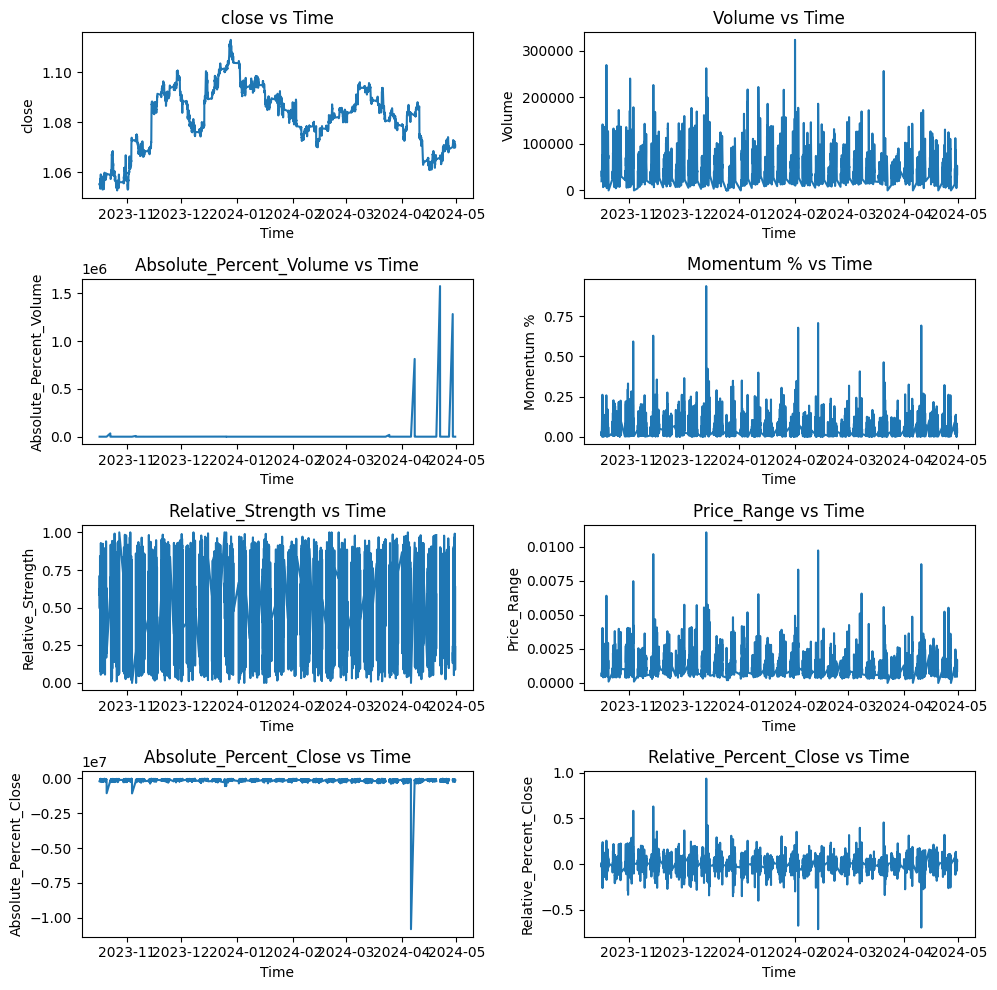

In [221]:
# Plot different time series plots in the same figure

# Close vs time

# Volume  vs time

# Absolute Percent Volume vs time

# Momentum % vs time

# Relative Strength vs time

# Price Range vs time

# Absolute Percent Close vs time

# Relative Percent Close vs time

fig, axes = plt.subplots(4, 2, figsize=(10, 10))

col_plot = ['close', 'Volume', 'Absolute_Percent_Volume', 'Momentum %', 'Relative_Strength', 'Price_Range', 'Absolute_Percent_Close', 'Relative_Percent_Close']

for i, col in enumerate(col_plot):
    ax = axes[i // 2, i % 2]
    ax.plot(df_mod['time'], df_mod[col])
    ax.set_xlabel('Time')
    ax.set_ylabel(col)
    ax.set_title(col+ ' vs Time')

plt.tight_layout()
plt.show()


### Seems that some of the indicators could be correlated with trading volume. Observe the volume spikes (Volume vs Time) and then note that in other timeseries plots spikes occur in similar places.

### Makes sense, for something out of the normal to happen non-ordinary trading activity is needed which is reflected in the volume plot.

### Is there maybe a pattern where certain times of the day or certain days of the week have consistently higher trading activity(average volume is greater)?

### Are the indicators and volume correlated at all? What are the correlations between them and volume, and among each other?


In [222]:
df_mod.columns

Index(['time', 'open', 'high', 'low', 'close', 'Volume', 'Short MA', 'Long MA',
       'Histogram', 'MACD', 'Signal', '%K', '%D', 'RSI', 'RSI-based MA',
       'Volume_Change', 'Open_change', 'High_change', 'Low_change',
       'Close_change', 'Price_Move', 'Volume_Move', 'Cumulative_Volume_Move',
       'Price_Range', 'Relative_Percent_Close', 'Absolute_Percent_Close',
       'Absolute_Percent_Volume', 'Relative_Strength', 'Momentum',
       'Momentum %'],
      dtype='object')

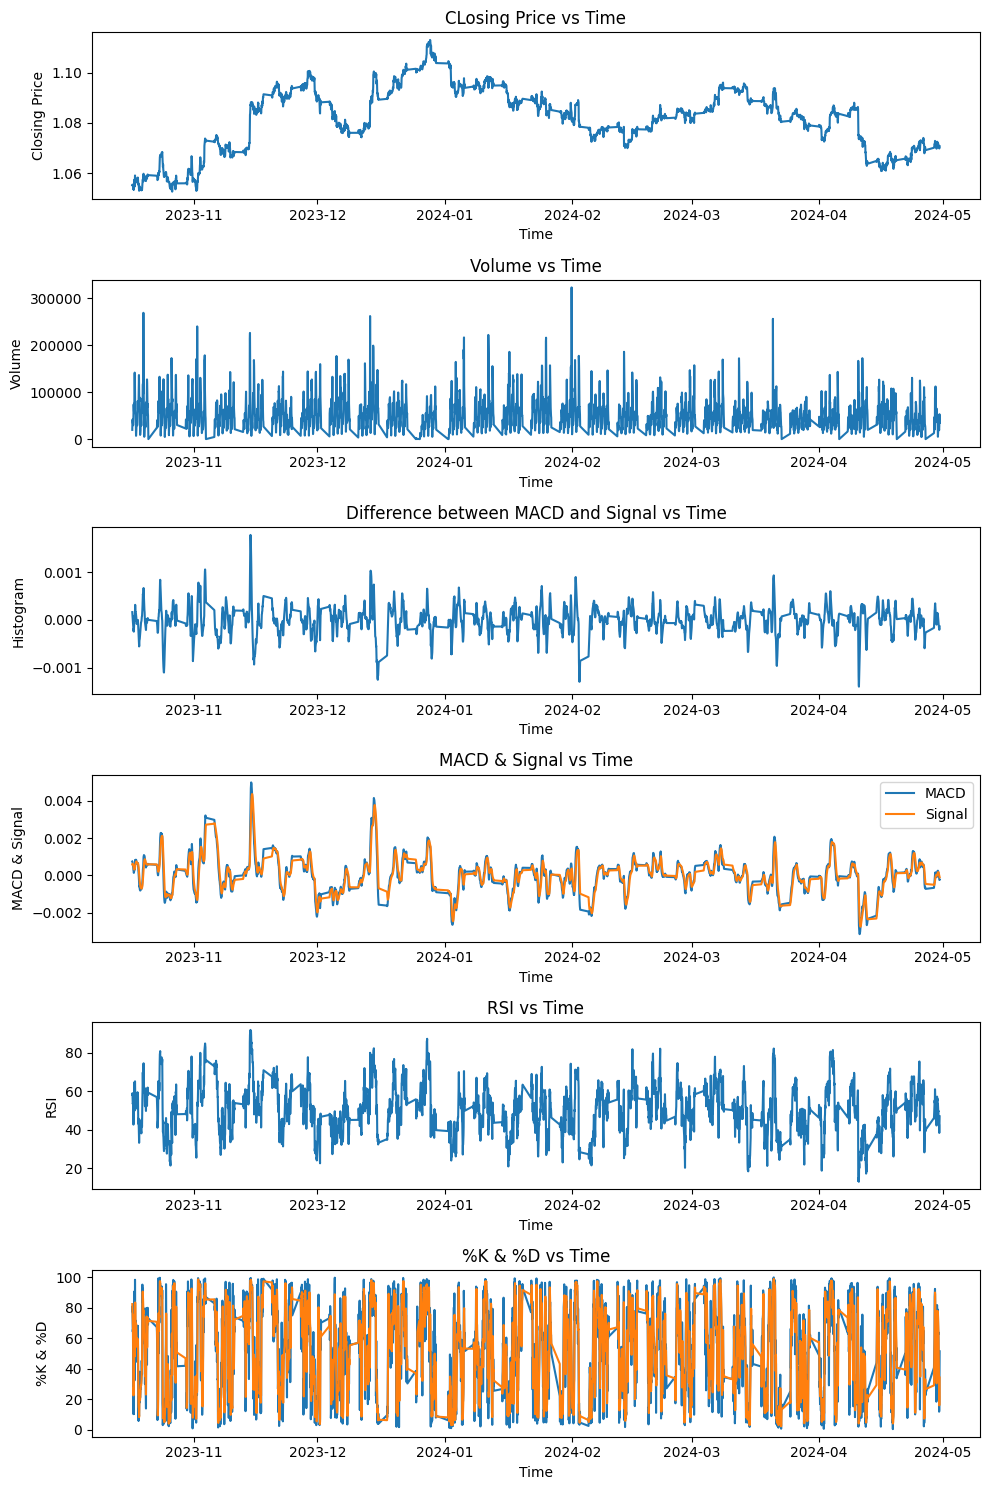

In [223]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=(10, 15))

col_plot = ['close', 'Volume', 'Histogram', 'MACD','RSI', 'Signal', '%K', '%D', ]

ax1.plot(df_mod['time'], df_mod['close'])
ax1.set_title('CLosing Price vs Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Closing Price')

ax2.plot(df_mod['time'], df_mod['Volume'])
ax2.set_title('Volume vs Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Volume')

ax3.plot(df_mod['time'], df_mod['Histogram'])
ax3.set_title('Difference between MACD and Signal vs Time')
ax3.set_xlabel('Time')
ax3.set_ylabel('Histogram')

ax4.plot(df_mod['time'], df_mod['MACD'], label='MACD')
ax4.plot(df_mod['time'], df_mod['Signal'], label='Signal')
ax4.set_title('MACD & Signal vs Time')
ax4.set_xlabel('Time')
ax4.set_ylabel('MACD & Signal')
ax4.legend()

ax5.plot(df_mod['time'], df_mod['RSI'], label='RSI')
ax5.set_title('RSI vs Time')
ax5.set_xlabel('Time')
ax5.set_ylabel('RSI')

ax6.plot(df_mod['time'], df_mod['%K'], label='%K')
ax6.plot(df_mod['time'], df_mod['%D'], label='%D')
ax6.set_title('%K & %D vs Time')
ax6.set_xlabel('Time')
ax6.set_ylabel('%K & %D')

plt.tight_layout()
plt.show()



### Define the target variable:
1. Change in CLose Price (lag of 1)





### Perform feature selection for ML models:

* plot a correlation matrix of the features (explore the correlations in the data)

* Perform ANOVA to find the F score for each feature with respect to the target variable (only for (2) --> target must be categorical for ANOVA)

* Do an ANOVA F-test to assess the relationship between the individual features and the target (see which features have a greater impact on the target)

* pick the feature with the higher F-Score out of a pair of highly correlated features

* Fit an RF/Gradient Boosting/XGB/Linear Regression and look at importance scores/weights of each feature (on the original dataset for regression (1)) (can also do it for (2) as confirmation)


In [224]:
df_mod['stoch'] = df_mod['%K'] - df_mod['%D']

truth_value = df_mod['Histogram']==df_mod['MACD']- df_mod['Signal']
print(truth_value)


0       False
1       False
2       False
3       False
4       False
        ...  
3330    False
3331     True
3332     True
3333    False
3334     True
Length: 3335, dtype: bool


In [225]:
df_mod['MACD-Signal'] = df_mod['MACD'] - df_mod['Signal']
print(df_mod[['Histogram','MACD-Signal', 'MACD', 'Signal']])
#so histogram = MACD - Signal


      Histogram  MACD-Signal      MACD    Signal
0      0.000164     0.000164  0.000743  0.000579
1      0.000117     0.000117  0.000725  0.000608
2      0.000055     0.000055  0.000677  0.000622
3     -0.000012    -0.000012  0.000607  0.000619
4     -0.000055    -0.000055  0.000550  0.000605
...         ...          ...       ...       ...
3330  -0.000158    -0.000158 -0.000089  0.000069
3331  -0.000171    -0.000171 -0.000144  0.000026
3332  -0.000207    -0.000207 -0.000233 -0.000026
3333  -0.000182    -0.000182 -0.000254 -0.000071
3334  -0.000137    -0.000137 -0.000243 -0.000106

[3335 rows x 4 columns]


In [226]:
del df_mod['MACD-Signal']

In [227]:
df_mod.columns

Index(['time', 'open', 'high', 'low', 'close', 'Volume', 'Short MA', 'Long MA',
       'Histogram', 'MACD', 'Signal', '%K', '%D', 'RSI', 'RSI-based MA',
       'Volume_Change', 'Open_change', 'High_change', 'Low_change',
       'Close_change', 'Price_Move', 'Volume_Move', 'Cumulative_Volume_Move',
       'Price_Range', 'Relative_Percent_Close', 'Absolute_Percent_Close',
       'Absolute_Percent_Volume', 'Relative_Strength', 'Momentum',
       'Momentum %', 'stoch'],
      dtype='object')

In [228]:
df_mod['Close_Percent_Change(Cont Target)'] = df_mod['close'].pct_change()


In [229]:
# Summary statistics for the 'Price' column
price_stats_percent = df_mod['Close_Percent_Change(Cont Target)'].describe()
print(price_stats_percent) #shows percentage values

count    3334.000000
mean        0.000005
std         0.000807
min        -0.007075
25%        -0.000330
50%         0.000000
75%         0.000352
max         0.009373
Name: Close_Percent_Change(Cont Target), dtype: float64


In [230]:
print(df_mod.Close_change.head())
print(df_mod['Close_change'].describe())

0        NaN
1    0.00013
2   -0.00034
3   -0.00030
4    0.00006
Name: Close_change, dtype: float64
count    3334.000000
mean        0.000005
std         0.000872
min        -0.007630
25%        -0.000360
50%         0.000000
75%         0.000380
max         0.010110
Name: Close_change, dtype: float64


In [231]:
# Create the categorical target based on close price change
upper = df_mod['Close_change'].quantile(0.65)
lower = df_mod['Close_change'].quantile(0.45)
print(upper)
print(lower)

#roughly 4-1 profit margin

0.00019999999999997797
-5.999999999994898e-05


In [232]:
# Conditions and category assignments
conditions = [
    (df_mod['Close_change'] >= upper),
    (df_mod['Close_change'] < upper ) & (df_mod['Close_change'] > lower),
    (df_mod['Close_change'] <= lower)
]
categories = ['Up', 'Neutral', 'Down']

# Bullish less risky model, since it only predicts 'UP' for a substantial positive price delta prediction
# comparatively, the absolute value of the selling threshhold ('DOWN' prediction) is not as high as for buying threshhold

df_mod['Direction_hourly (Categorical target)'] = np.where(conditions[0], categories[0],
                              np.where(conditions[1], categories[1], categories[2]))



## Perform Feature Selection!

In [233]:

#encode the only non-numerical column for the correlation matrix
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_mod['Direction_hourly (encoded)'] = encoder.fit_transform(df_mod[['Direction_hourly (Categorical target)']])

In [234]:
#let's compute the correlation matrix and look at the correlation between features
corr_columns =  df_mod.columns.difference(['Direction_hourly (Categorical target)'])
corr_matrix = df_mod[corr_columns].corr()
# print(corr_matrix)



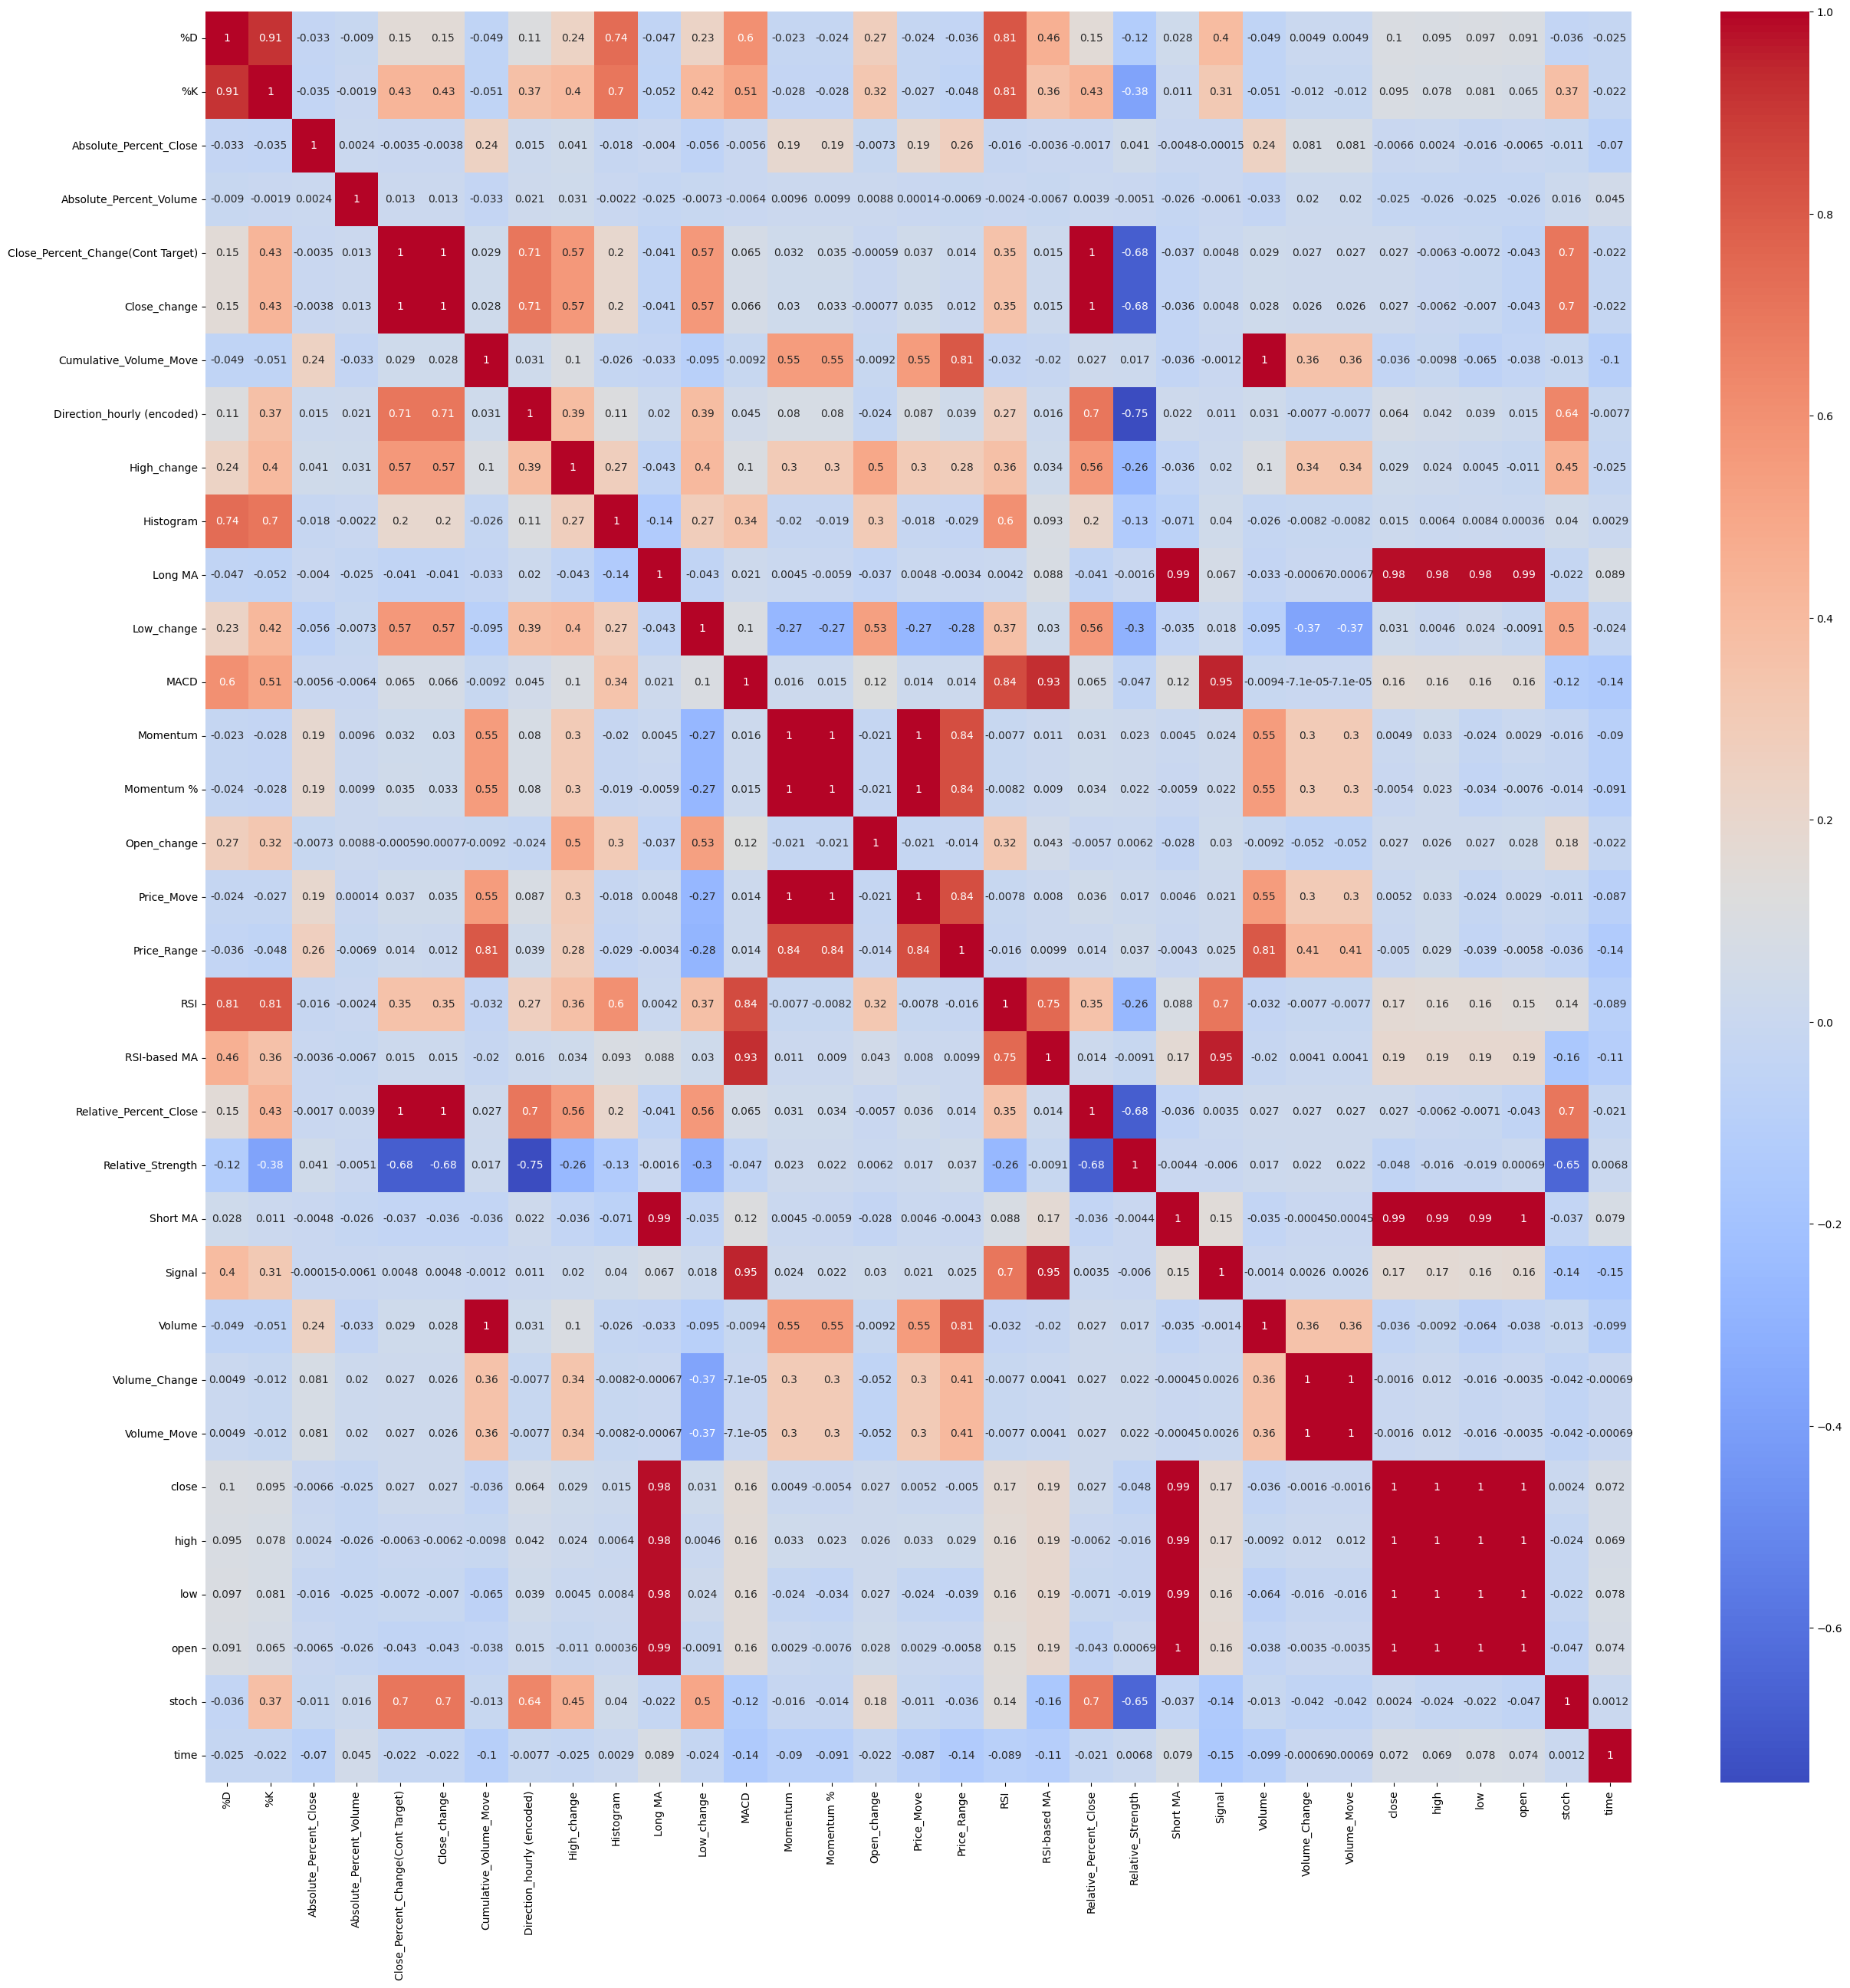

In [235]:

import seaborn as sns
# Create the heatmap
plt.figure(figsize=(30, 30))  # Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # 'coolwarm' for better contrast
plt.show()


In [236]:
#lets do chi-square test for categorical target variables (Direction_hourly)
from scipy.stats import chi2_contingency
alpha = 0.05

chi_df = pd.DataFrame(columns=['feature', 'chi_square_stat', 'p_value'])

chi_target = df_mod['Direction_hourly (Categorical target)']

for col in df_mod.columns.difference(['Direction_hourly (Categorical target)', 'Direction_hourly (encoded)']):

  contingency_table = pd.crosstab(df_mod[col], chi_target)
  chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

  # Add results as a new row in the results DataFrame
  chi_df = pd.concat([chi_df, pd.DataFrame({'feature': col, 'chi_square_stat': chi2_stat,
                                    'p_value': p_val}, index=[0])], ignore_index=True)

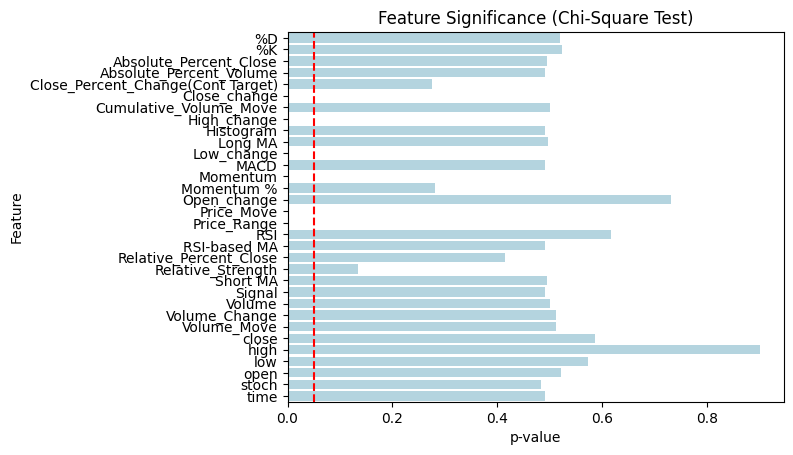

In [237]:


# Create the bar plot
sns.barplot(
    x = "p_value",
    y = "feature",
    data=chi_df,
    orient='h',  # Horizontal bars
    color='lightblue'
)


# Add vertical line at p = 0.05
plt.axvline(x=0.05, color='red', linestyle='--')


# Labels and Title
plt.xlabel("p-value")
plt.ylabel("Feature")
plt.title("Feature Significance (Chi-Square Test)")

plt.show()


### Seems that only the Absolute Percent_Close feature has a statistically significant relationship with categorical target feature of price direction, which is confirmed by the correlation matrix (0.89)
### Next in line is the Relative Strength feature, but it is not less than the p-value

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4178: RuntimeWarning: invalid value encountered in subtract
  alldata -= offset
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4186: RuntimeWarning: invalid value encountered in subtract
  ssbn += _square_of_sums(sample - offset,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


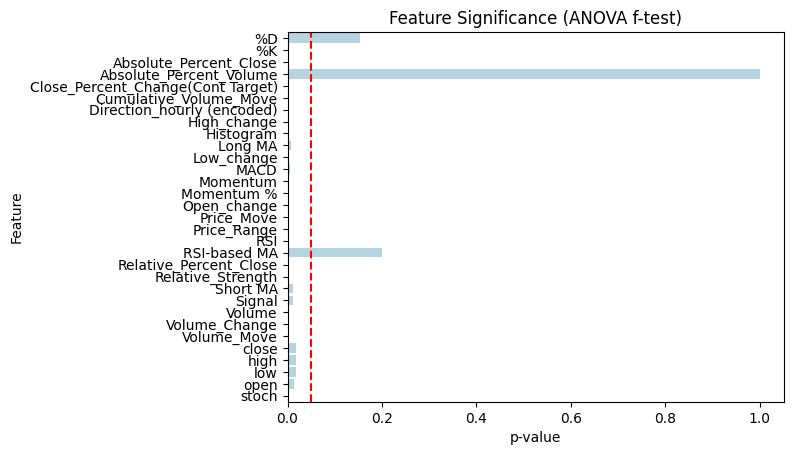

In [238]:
#let's do ANOVA f-test for Close change (continous target variable)

from scipy.stats import f_oneway

# Separate features and target
X = df_mod.columns.difference(['Close_change', 'CLose_Percet_Change(Cont_Target)', 'Direction_hourly (Categorical target)', 'time'])
y = df_mod['Close_change']

# Empty dictionary to store results
results = {}

# Iterate through training features
for feature_name in X:
    groups = df_mod.groupby(y)[feature_name].apply(list)  # Group data by target class
    f_statistic, p_value = f_oneway(*groups)
    results[feature_name] = p_value


# Create the bar plot
sns.barplot(
    x = results.values(),
    y = results.keys(),
    data=results,
    orient='h',  # Horizontal bars
    color='lightblue'
)


# Add vertical line at p = 0.05
plt.axvline(x=0.05, color='red', linestyle='--')


# Labels and Title
plt.xlabel("p-value")
plt.ylabel("Feature")
plt.title("Feature Significance (ANOVA f-test)")

plt.show()


### The features that have p-values less than 0.05 (alpha) have a potentially stronger association with the target feature (Close change) relative to other features.

### Meaning all features except RSI-based MA, Absolute_Percent_Volume and %D

In [239]:
df_mod.columns

Index(['time', 'open', 'high', 'low', 'close', 'Volume', 'Short MA', 'Long MA',
       'Histogram', 'MACD', 'Signal', '%K', '%D', 'RSI', 'RSI-based MA',
       'Volume_Change', 'Open_change', 'High_change', 'Low_change',
       'Close_change', 'Price_Move', 'Volume_Move', 'Cumulative_Volume_Move',
       'Price_Range', 'Relative_Percent_Close', 'Absolute_Percent_Close',
       'Absolute_Percent_Volume', 'Relative_Strength', 'Momentum',
       'Momentum %', 'stoch', 'Close_Percent_Change(Cont Target)',
       'Direction_hourly (Categorical target)', 'Direction_hourly (encoded)'],
      dtype='object')

Skipping %D due to ValueError
Skipping %K due to ValueError
Skipping Absolute_Percent_Close due to ValueError
Skipping Absolute_Percent_Volume due to ValueError
Skipping Close_Percent_Change(Cont Target) due to ValueError
Skipping Cumulative_Volume_Move due to ValueError
Skipping High_change due to ValueError
Skipping Histogram due to ValueError
Skipping Long MA due to ValueError
Skipping Low_change due to ValueError
Skipping MACD due to ValueError
Skipping Momentum due to ValueError
Skipping Momentum % due to ValueError
Skipping Open_change due to ValueError
Skipping Price_Move due to ValueError
Skipping Price_Range due to ValueError
Skipping RSI due to ValueError
Skipping RSI-based MA due to ValueError
Skipping Relative_Percent_Close due to ValueError
Skipping Relative_Strength due to ValueError
Skipping Short MA due to ValueError
Skipping Signal due to ValueError
Skipping Volume due to ValueError
Skipping Volume_Change due to ValueError
Skipping Volume_Move due to ValueError
Skippin

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


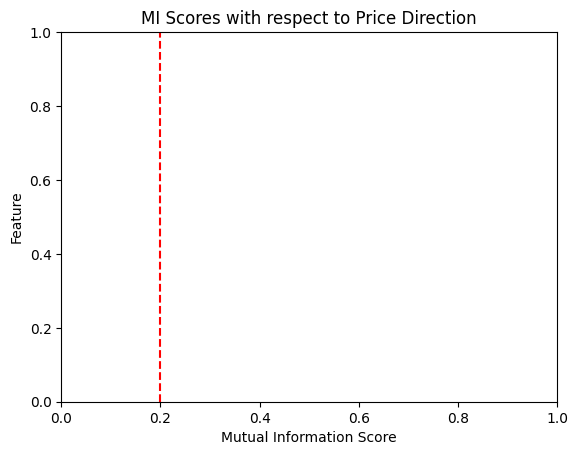

In [240]:

from sklearn.feature_selection import mutual_info_regression, mutual_info_classif


# Separate features and target
X = df_mod.columns.difference(['Close_change', 'CLose_Percet_Change(Cont Target)', 'Direction_hourly (Categorical target)', 'time', 'Direction_hourly (encoded)'])
y = df_mod['Direction_hourly (encoded)']

df_mod.dropna(inplace=True)

# Empty dictionary to store results
results = {}

# Calculate Mutual Information
for feature_name in X:
  try:
    mi_score = mutual_info_classif(df_mod[feature_name].values.reshape(-1, 1), y)[0]
    results[feature_name] = mi_score
  except ValueError:
      print(f"Skipping {feature_name} due to ValueError")

# Create the bar plot
sns.barplot(
    x = results.values(),
    y = results.keys(),
    data=results,
    orient='h',  # Horizontal bars
    color='lightblue'
)


# Add vertical line at 0.2
plt.axvline(x=0.2, color='red', linestyle='--')


# Labels and Title
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("MI Scores with respect to Price Direction")

plt.show()


### The higher the Mutual Information score between the training features and target, the greater the pairwise dependence.

### Absolute Percent Close, Close Percent Change, Momentum, Price Move, Relative Percent Close, Stochastic have the strongest dependence (relation) between them and Price Direction.

### Some trivially make sense since Price Direction was directly defined based on Close change.

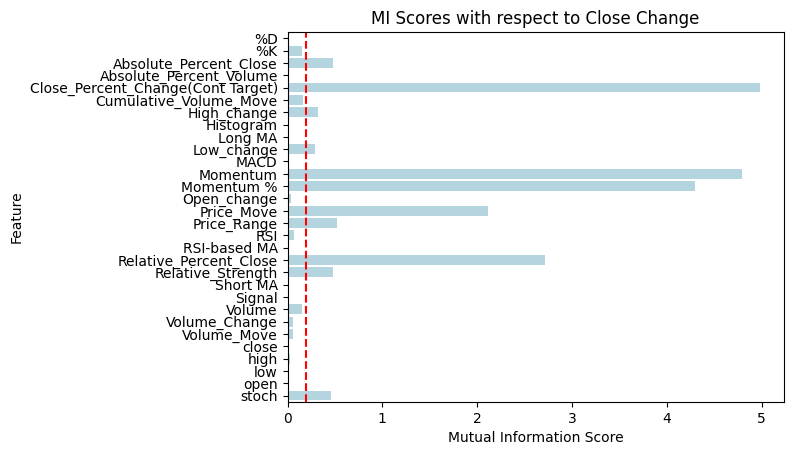

In [241]:



# Separate features and target
X = df_mod.columns.difference(['Close_change', 'CLose_Percet_Change(Cont Target)', 'Direction_hourly (Categorical target)', 'time', 'Direction_hourly (encoded)'])
y = df_mod['Close_change']

# Empty dictionary to store results
results = {}

# Calculate Mutual Information
for feature_name in X:
  try:
    mi_score = mutual_info_regression(df_mod[feature_name].values.reshape(-1, 1), y)[0]
    results[feature_name] = mi_score
  except ValueError:
      print(f"Skipping {feature_name} due to ValueError")

# Create the bar plot
sns.barplot(
    x = results.values(),
    y = results.keys(),
    data=results,
    orient='h',  # Horizontal bars
    color='lightblue'
)


# Add vertical line at 0.2
plt.axvline(x=0.2, color='red', linestyle='--')


# Labels and Title
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("MI Scores with respect to Close Change")

plt.show()


### The Mutual Information scale is different this time, meaning there is a stronger relation between the continous target 'Close change' and the features, compared to the categorical target.

### In addition to the previously mentioned features Price range, Low change, High change are now added to the list of potentially significant features in relation to the target.


### Let's select

### We have performed some statistical tests such as Chi-Square, ANOVA f-test, Mutual Information and Correlation Matrix to see which features have a better link to the Target Features (Close Change (cont) & Price Direction).

### Now will again perform feature selection but now using Random Forest (a decision tree ensemble method) and it's feature importance scores. We will the method twice to find two sets of feature scores, one relating to our continous target feature and the other one relating to the categorical target.


### Once we are done, we will compare desicion tree feature importance output to the feature statistics from statistical tests/methods and pick the best intersection.

In [242]:
df_mod.columns

Index(['time', 'open', 'high', 'low', 'close', 'Volume', 'Short MA', 'Long MA',
       'Histogram', 'MACD', 'Signal', '%K', '%D', 'RSI', 'RSI-based MA',
       'Volume_Change', 'Open_change', 'High_change', 'Low_change',
       'Close_change', 'Price_Move', 'Volume_Move', 'Cumulative_Volume_Move',
       'Price_Range', 'Relative_Percent_Close', 'Absolute_Percent_Close',
       'Absolute_Percent_Volume', 'Relative_Strength', 'Momentum',
       'Momentum %', 'stoch', 'Close_Percent_Change(Cont Target)',
       'Direction_hourly (Categorical target)', 'Direction_hourly (encoded)'],
      dtype='object')

In [243]:
#train a Random Forest to get feature importance scores related to the continous target feature (Close change)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rf_cols = df_mod.columns.difference(['Close_change', 'CLose_Percet_Change(Cont Target)', 'Direction_hourly (Categorical target)', 'time', 'Direction_hourly (encoded)', 'Close', 'Momentum', 'Momentum %', 'Close_Percent_Change(Cont Target)']) #exclude the target feature and the features that were directly defined in terms of the target from the training set
X = df_mod[rf_cols]
X = X.astype('float32')
y = df_mod['Close_change'] #continous target feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

rf = RandomForestRegressor(random_state=69)  # Set random_state for reproducibility
rf.fit(X_train, y_train)

importances = rf.feature_importances_ #access the importance scores

zipped = list(zip(X.columns, importances))
# View feature names and their scores
for name, score in zipped:
    print(f"{name}: {score}")



%D: 0.0001864154165586474
%K: 0.0005052754577624692
Absolute_Percent_Close: 0.010449411955602641
Absolute_Percent_Volume: 0.004925747304851913
Cumulative_Volume_Move: 0.0008001302449129875
High_change: 0.0034754123072158125
Histogram: 0.0004920092295031737
Long MA: 0.0003980306168976876
Low_change: 0.005158562049566927
MACD: 0.00015719065810509774
Open_change: 0.0003486264639423951
Price_Move: 0.18862878049135326
Price_Range: 0.012392983710595
RSI: 0.000948229956666537
RSI-based MA: 0.00026613178472035897
Relative_Percent_Close: 0.7597859756705881
Relative_Strength: 0.0004127599222006199
Short MA: 0.0001491006328543566
Signal: 0.0004695590552081997
Volume: 0.0008764398054501201
Volume_Change: 0.004791178114650634
Volume_Move: 0.002166883850057761
close: 0.0002305798992970125
high: 0.00020946276991907798
low: 0.0006571873684453544
open: 0.00020910104671968083
stoch: 0.0009088342163541892


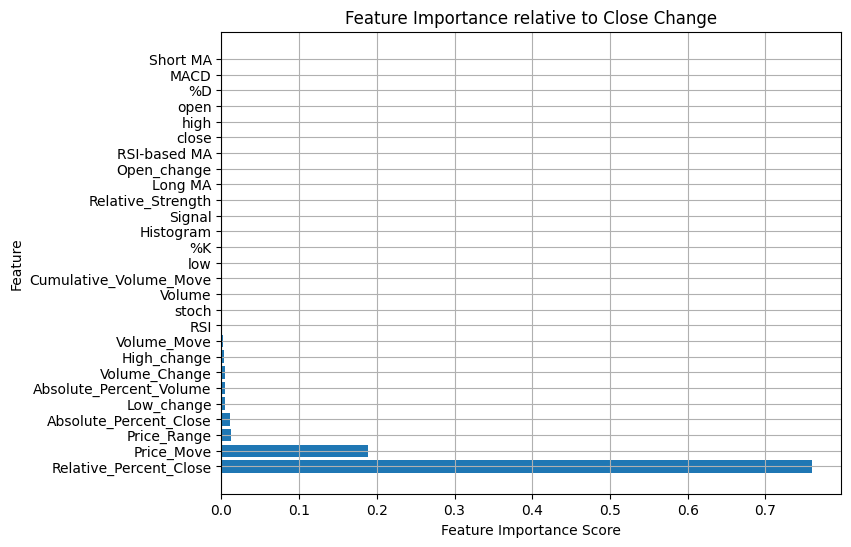

In [244]:

# 1. Sort the list based on the second value in descending order
sorted_list = sorted(zipped, key=lambda x: x[1], reverse=True)


# 2. Extract feature names and scores separately
feature_names = [item[0] for item in sorted_list]
importance_scores = [item[1] for item in sorted_list]


# 3. Create the bar plot
plt.figure(figsize=(8, 6)) # Adjust figure size if needed
plt.barh(feature_names, importance_scores)

# Labels and Title
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance relative to Close Change")
plt.grid(True)

plt.show()


In [245]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



y_true = y_test  # Actual target values from your test set
y_pred = rf.predict(X_test)  # Predictions made by your model

r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


R-squared: 0.9874484001682002
MAE: 5.030912364946107e-05
MSE: 9.479402196878946e-09
RMSE: 9.736222161022696e-05


In [246]:
from sklearn.ensemble import RandomForestClassifier

y = df_mod['Direction_hourly (Categorical target)']
rf_class_cols = df_mod.columns.difference(['Close_change', 'CLose_Percet_Change(Cont Target)', 'Direction_hourly (Categorical target)', 'time', 'Direction_hourly (encoded)', 'Momentum', 'Momentum %'])
X = df_mod[rf_class_cols]
X = X.astype('float32')
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

# Train RandomForestClassifier
rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train, y_train)

# Get feature importances
importances = rf_class.feature_importances_


zipped_cl = list(zip(X.columns, importances))
# View feature names and their scores
for name, score in zipped_cl:
    print(f"{name}: {score}")


%D: 0.004305005311960233
%K: 0.009145038876223446
Absolute_Percent_Close: 0.009652366374077478
Absolute_Percent_Volume: 0.004270395602173175
Close_Percent_Change(Cont Target): 0.31098923757527547
Cumulative_Volume_Move: 0.005925729162108842
High_change: 0.021573039035546422
Histogram: 0.0032813420696331808
Long MA: 0.0019110180600590923
Low_change: 0.02428299787365639
MACD: 0.002807863928501003
Open_change: 0.006309311332309536
Price_Move: 0.10188326526049664
Price_Range: 0.011921488143978589
RSI: 0.004469388878064081
RSI-based MA: 0.0023038764392999816
Relative_Percent_Close: 0.27954992161076453
Relative_Strength: 0.10348597322164485
Short MA: 0.0022427675999453487
Signal: 0.00345053410701126
Volume: 0.006876986463035125
Volume_Change: 0.002887409449040517
Volume_Move: 0.0026807198006244064
close: 0.0024691609822862317
high: 0.0019055750524331135
low: 0.0021111125719727292
open: 0.0017974722485231767
stoch: 0.06551100296935516


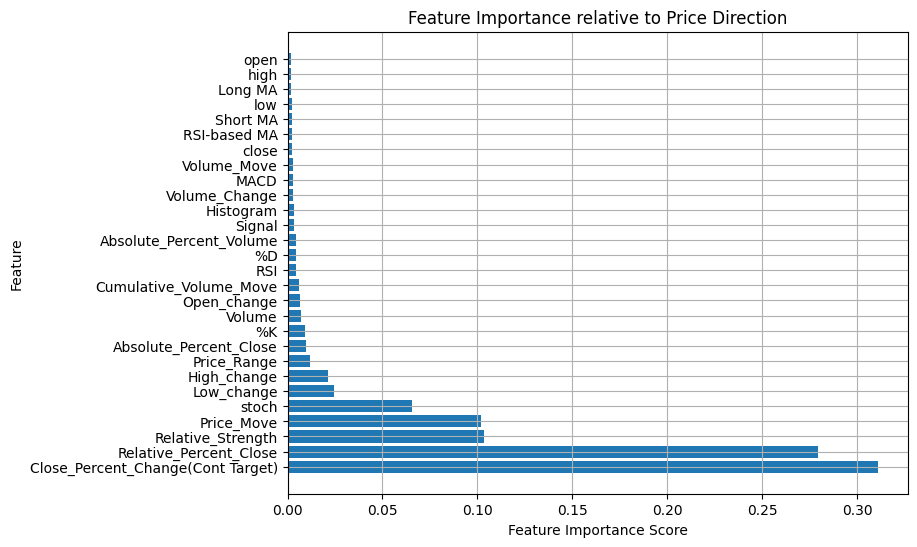

In [247]:
# 1. Sort the list based on the second value in descending order
sorted_list_cl = sorted(zipped_cl, key=lambda x: x[1], reverse=True)


# 2. Extract feature names and scores separately
feature_names = [item[0] for item in sorted_list_cl]
importance_scores = [item[1] for item in sorted_list_cl]


# 3. Create the bar plot
plt.figure(figsize=(8, 6)) # Adjust figure size if needed
plt.barh(feature_names, importance_scores)

# Labels and Title
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance relative to Price Direction")
plt.grid(True)

plt.show()

In [249]:
# handling potential values that are too large to be stored in a float32 format

def convert_with_error_handling(df):
    for col in df.columns:
        try:
            df[col] = df[col].astype('float32')
        except OverflowError as e:
            print(f"Error converting column '{col}': {e}")
            for value in df[col].values:
                if value > np.finfo('float32').max or value < np.finfo('float32').min:
                    print(f"  - Problematic Value: {value}")



convert_with_error_handling(X.copy())  # Use copy() to avoid modifying the original


## Pick the best features!

In [250]:
# there are about 27 features in the dataset right now
# some of them are redundant or have little significance with respect to the target

# we'd like to select about half (about 13) of the features to train the ML models on:

  # 13 features for the continous target (Close Change)

#for each target we will do a final separate feature selection procedure using the wrapper method on a LSTM model,
#where the method removes the least important feature from the model recursively.

# Then we will decide which features to pick: (in conjunction with previous methods)

### There are about 30 features in the dataset right now. Some of them are redundant or have little significance with respect to the target

### We'd like to select about half (about 15) of the features to train the ML models on:

  * 15 features for the continous target (Close change)


### Based on the above feature selection methods here are the feature picks for the continuous target (Close change):

* Stoch, Relative Strength, RSI, Low Change, High Change, Histogram, Volume, Volume Change, Price Range, Price Move, %K, %D, Relative Percent Close, Absolute Percent Close

In [251]:
# check what the index column of df_mod is
df_mod.time



1      2023-10-17 00:00:00+00:00
2      2023-10-17 01:00:00+00:00
3      2023-10-17 02:00:00+00:00
4      2023-10-17 03:00:00+00:00
5      2023-10-17 04:00:00+00:00
                  ...           
3330   2024-04-30 03:00:00+00:00
3331   2024-04-30 04:00:00+00:00
3332   2024-04-30 05:00:00+00:00
3333   2024-04-30 06:00:00+00:00
3334   2024-04-30 07:00:00+00:00
Name: time, Length: 3331, dtype: datetime64[ns, UTC]

In [390]:
#lets select our columns for model training
select_df = df_mod[['Close_change', 'stoch', 'RSI', 'Low_change', 'High_change', 'Histogram', 'Volume', 'Volume_Change', 'Price_Range', 'Price_Move', '%K', '%D', 'Relative_Percent_Close', 'Absolute_Percent_Close']]

## Standardize the selected features!

In [391]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

target = select_df['Close_change']
feats = select_df.drop('Close_change', axis=1)

# Create StandardScaler instances
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features and target
scaled_features = scaler_X.fit_transform(feats)
scaled_target = scaler_y.fit_transform(target.values.reshape(-1, 1))  # Reshape for single target

# Create new DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=feats.columns)
scaled_df['target'] = scaled_target

print(feats.columns)


print(scaled_df.head())

Index(['stoch', 'RSI', 'Low_change', 'High_change', 'Histogram', 'Volume',
       'Volume_Change', 'Price_Range', 'Price_Move', '%K', '%D',
       'Relative_Percent_Close', 'Absolute_Percent_Close'],
      dtype='object')
      stoch       RSI  Low_change  High_change  Histogram    Volume  \
0  0.117860  0.654236    0.170310     0.420061   0.388665 -0.382152   
1 -0.402607  0.420331   -0.608175    -0.608688   0.183166 -0.309486   
2 -0.688497  0.218905   -0.419832    -0.395411  -0.036684 -0.538796   
3 -0.131378  0.254601    0.220535     0.156601  -0.178384 -0.575714   
4 -1.542923  0.090512   -0.294270    -0.520868  -0.324105 -0.694484   

   Volume_Change  Price_Range  Price_Move        %K        %D  \
0       0.858495    -0.587661   -0.591868  0.998815  1.024698   
1       0.100882    -0.587661   -0.321598  0.693548  0.924699   
2      -0.322395    -0.563936   -0.351628  0.424195  0.760184   
3      -0.052723    -0.623248   -0.817093  0.478065  0.573089   
4      -0.167451    -0.836

## Transform dataframe of selected, standardized features into time-lagged arrays to be used as model training input

In [392]:
# transform the structure of the scaled data for CNN input and LSTM input

window_size = 24  # Size of the sliding window
overlap = 12 # Amount of overlap between windows

X = []
y = []

for i in range(window_size, len(scaled_df), window_size - overlap):  # Note the step size
    X.append(scaled_df.iloc[i-window_size:i].values)
    y.append(scaled_df.iloc[i]['target'])

X, y = np.array(X), np.array(y)
print(X.shape) # 276 is the number of windows with cardinality 24 and overlap of 12 that you can fit
print(X[0])
print(y[0])

#print(y[0])
#print(scaled_target[24])

(276, 24, 14)
[[ 0.11786001  0.65423608  0.17030982  0.42006132  0.38866473 -0.38215226
   0.85849473 -0.58766072 -0.59186826  0.99881544  1.02469753  0.18688341
  -0.1050028   0.14372276]
 [-0.40260665  0.42033145 -0.60817504 -0.6086878   0.18316606 -0.30948555
   0.100882   -0.58766072 -0.32159845  0.69354813  0.92469859 -0.42355229
  -0.10512782 -0.39498639]
 [-0.68849678  0.21890522 -0.41983193 -0.39541054 -0.03668408 -0.53879555
  -0.32239454 -0.56393577 -0.35162843  0.42419462  0.7601842  -0.40019277
  -0.08538876 -0.3491388 ]
 [-0.13137754  0.25460088  0.22053465  0.15660118 -0.1783838  -0.57571442
  -0.05272259 -0.62324814 -0.8170931   0.47806532  0.5730894  -0.03619469
  -0.1360922   0.06348948]
 [-1.54292254  0.09051174 -0.29426985 -0.52086775 -0.32410459 -0.6944835
  -0.16745088 -0.83677265 -0.59186826 -0.49410949  0.14638846 -0.21238237
  -0.4001588  -0.26890552]
 [-1.77105566 -0.14605352 -0.25660123  0.04368969 -0.48704135 -0.50668413
   0.26226185 -0.5520733  -0.39667339 

## Create, train and tune models!
## CNN, LSTM, N-Beats!

### CNN

In [255]:
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop,  Adamax
from keras.regularizers import l2, l1

# Set random seed for reproducibility
random.seed(90)
np.random.seed(90)
tf.random.set_seed(90)

cnn = Sequential()
cnn.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(24, 14)))  # L2 regularization
cnn.add(AveragePooling1D(pool_size=2))
cnn.add(Dropout(0.5))
cnn.add(Flatten())
cnn.add(Dense(8, activation='relu', kernel_regularizer=l2(0.0001)))  # L2 regularization
cnn.add(Dense(1))

cnn.compile(optimizer=SGD(0.0001), loss='mean_squared_error')

In [256]:
history = cnn.fit(X, y, epochs=70, batch_size=8, validation_split=0.3)  # Adjust parameters


Epoch 1/70
25/25 [==============================] - 1s 19ms/step - loss: 2.2665 - val_loss: 0.8143
Epoch 2/70
25/25 [==============================] - 0s 9ms/step - loss: 2.7802 - val_loss: 0.7896
Epoch 3/70
25/25 [==============================] - 0s 8ms/step - loss: 2.1337 - val_loss: 0.7785
Epoch 4/70
25/25 [==============================] - 0s 10ms/step - loss: 1.9900 - val_loss: 0.7711
Epoch 5/70
25/25 [==============================] - 0s 10ms/step - loss: 2.1440 - val_loss: 0.7609
Epoch 6/70
25/25 [==============================] - 0s 9ms/step - loss: 1.7814 - val_loss: 0.7568
Epoch 7/70
25/25 [==============================] - 0s 7ms/step - loss: 1.8991 - val_loss: 0.7546
Epoch 8/70
25/25 [==============================] - 0s 8ms/step - loss: 2.1713 - val_loss: 0.7497
Epoch 9/70
25/25 [==============================] - 0s 7ms/step - loss: 1.7393 - val_loss: 0.7473
Epoch 10/70
25/25 [==============================] - 0s 8ms/step - loss: 1.9325 - val_loss: 0.7433
Epoch 11/70
25/2

## LSTM

In [257]:
from keras.layers import BatchNormalization, Activation
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set random seed for reproducibility
random.seed(90)
np.random.seed(90)
tf.random.set_seed(90)

lstm = Sequential()
lstm.add(LSTM(units=32, input_shape=(24, 14)))
lstm.add(BatchNormalization())
lstm.add(Activation('relu'))
lstm.add(Dropout(0.2))


lstm.add(Dense(1))

lstm.compile(optimizer=SGD(0.0001), loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

history = lstm.fit(X, y, epochs=100, batch_size=16, validation_split=0.3, callbacks = [early_stopping, lr_reducer])  # Adjust parameters

Epoch 1/100
13/13 [==============================] - 9s 91ms/step - loss: 2.7976 - val_loss: 0.6537 - lr: 1.0000e-04
Epoch 2/100
13/13 [==============================] - 0s 28ms/step - loss: 2.8123 - val_loss: 0.6530 - lr: 1.0000e-04
Epoch 3/100
13/13 [==============================] - 0s 27ms/step - loss: 2.9731 - val_loss: 0.6519 - lr: 1.0000e-04
Epoch 4/100
13/13 [==============================] - 0s 28ms/step - loss: 2.8163 - val_loss: 0.6521 - lr: 1.0000e-04
Epoch 5/100
13/13 [==============================] - 0s 30ms/step - loss: 2.8154 - val_loss: 0.6512 - lr: 1.0000e-04
Epoch 6/100
13/13 [==============================] - 0s 28ms/step - loss: 2.7591 - val_loss: 0.6501 - lr: 1.0000e-04
Epoch 7/100
13/13 [==============================] - 0s 25ms/step - loss: 2.7772 - val_loss: 0.6498 - lr: 1.0000e-04
Epoch 8/100
13/13 [==============================] - 0s 29ms/step - loss: 2.6976 - val_loss: 0.6501 - lr: 1.0000e-04
Epoch 9/100
13/13 [==============================] - 0s 27ms/ste

In [258]:
print(X.shape)
print(y.shape)
val_cut = int(0.3 * len(X))
X_train, X_val = X[:-val_cut], X[-val_cut:]
y_train, y_val = y[:-val_cut], y[-val_cut:]
print(X_train.shape)
print(X_val.shape)

(276, 24, 14)
(276,)
(194, 24, 14)
(82, 24, 14)


In [259]:
 %pip install -q -U keras-tuner
 import kerastuner as kt
 from kerastuner.tuners import RandomSearch

 def build_lstm_model(hp):
    lstm_units = hp.Int("lstm_units", min_value=8, max_value=128, step=30)  # LSTM units
    num_lstm_layers = hp.Int("num_lstm_layers", min_value=0, max_value=2, step=1)  # Number of LSTM layers
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    dropout_rate = hp.Float("dropout_rate", min_value=0.2, max_value=0.5, step=0.1)

    model = Sequential()

    for _ in range(num_lstm_layers):
        model.add(LSTM(units=lstm_units, return_sequences=True))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(dropout_rate))

    # Final LSTM layer with return_sequences=False as we only want the last output for the dense layer
    model.add(LSTM(units=lstm_units, return_sequences=False))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="linear"))

    # Choose optimizer
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mse"])

    return model


In [260]:
random_search_tuner = kt.RandomSearch(build_lstm_model, objective="val_loss", max_trials=20, overwrite=True, directory="my_dir", project_name="my_rnd_search", seed=90)

random_search_tuner.search(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Trial 20 Complete [00h 00m 28s]
val_loss: 0.7113927602767944

Best val_loss So Far: 0.6681288480758667
Total elapsed time: 00h 09m 16s


In [261]:
#what are the top-3 according to the above search of possible lstm hyperparams

top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
print(top3_params[0].values) #1
print(top3_params[1].values) #2
print(top3_params[2].values) #3


{'lstm_units': 68, 'num_lstm_layers': 0, 'learning_rate': 0.001047217795168058, 'dropout_rate': 0.2, 'optimizer': 'adam'}
{'lstm_units': 128, 'num_lstm_layers': 2, 'learning_rate': 0.0003021384939866327, 'dropout_rate': 0.4, 'optimizer': 'adam'}
{'lstm_units': 8, 'num_lstm_layers': 1, 'learning_rate': 0.00019785289659117255, 'dropout_rate': 0.4, 'optimizer': 'adam'}


In [262]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 06 summary
Hyperparameters:
lstm_units: 68
num_lstm_layers: 0
learning_rate: 0.001047217795168058
dropout_rate: 0.2
optimizer: adam
Score: 0.6681288480758667


In [263]:
random.seed(90)
np.random.seed(90)
tf.random.set_seed(90)

# Build the model with the best hyperparameters
best_hps=random_search_tuner.get_best_hyperparameters(num_trials=1)[0]
model = random_search_tuner.hypermodel.build(best_hps)  # Rebuild the model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)


model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=16, callbacks=[early_stopping, lr_reducer]) # Train it on some data
model.summary()


Epoch 1/30
13/13 [==============================] - 11s 327ms/step - loss: 2.7437 - mse: 2.7437 - val_loss: 0.6999 - val_mse: 0.6999 - lr: 0.0010
Epoch 2/30
13/13 [==============================] - 1s 88ms/step - loss: 1.5893 - mse: 1.5893 - val_loss: 0.7955 - val_mse: 0.7955 - lr: 0.0010
Epoch 3/30
13/13 [==============================] - 1s 82ms/step - loss: 1.5097 - mse: 1.5097 - val_loss: 0.8139 - val_mse: 0.8139 - lr: 0.0010
Epoch 4/30
13/13 [==============================] - 1s 39ms/step - loss: 1.4261 - mse: 1.4261 - val_loss: 0.8019 - val_mse: 0.8019 - lr: 0.0010
Epoch 5/30
13/13 [==============================] - 0s 37ms/step - loss: 1.3518 - mse: 1.3518 - val_loss: 0.8092 - val_mse: 0.8092 - lr: 0.0010
Epoch 6/30
13/13 [==============================] - 1s 46ms/step - loss: 1.4630 - mse: 1.4630 - val_loss: 0.8192 - val_mse: 0.8192 - lr: 0.0010
Epoch 7/30
13/13 [==============================] - 1s 53ms/step - loss: 1.2956 - mse: 1.2956 - val_loss: 0.8293 - val_mse: 0.8293 - l

In [264]:
# tune the hyperparameters of the above lstm model (keeping architecture the same)

random.seed(90)
np.random.seed(90)
tf.random.set_seed(90)


bayesian_opt_tuner = kt.BayesianOptimization(
 build_lstm_model, objective="val_loss", seed=90,
 max_trials=20, alpha=1e-4, beta=2.6,
 overwrite=True, directory="lstm_bayesian_search", project_name="bayesian_opt")

bayesian_opt_tuner.search(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

best_model = bayesian_opt_tuner.get_best_models(num_models=1)[0]

Trial 20 Complete [00h 00m 51s]
val_loss: 0.7266976237297058

Best val_loss So Far: 0.6856027245521545
Total elapsed time: 00h 08m 43s


In [265]:
best_trial = bayesian_opt_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 03 summary
Hyperparameters:
lstm_units: 128
num_lstm_layers: 2
learning_rate: 0.0003111457830207511
dropout_rate: 0.2
optimizer: sgd
Score: 0.6856027245521545


In [266]:
random.seed(90)
np.random.seed(90)
tf.random.set_seed(90)


best_hps = bayesian_opt_tuner.get_best_hyperparameters(num_trials=1)[0]
model = bayesian_opt_tuner.hypermodel.build(best_hps)  # Rebuild the model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)


model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=16, callbacks=[early_stopping, lr_reducer]) # Train it on some data
model.summary()


Epoch 1/30
13/13 [==============================] - 13s 231ms/step - loss: 2.0747 - mse: 2.0747 - val_loss: 0.7243 - val_mse: 0.7243 - lr: 3.1115e-04
Epoch 2/30
13/13 [==============================] - 1s 95ms/step - loss: 2.4612 - mse: 2.4612 - val_loss: 0.7190 - val_mse: 0.7190 - lr: 3.1115e-04
Epoch 3/30
13/13 [==============================] - 2s 153ms/step - loss: 1.9708 - mse: 1.9708 - val_loss: 0.7143 - val_mse: 0.7143 - lr: 3.1115e-04
Epoch 4/30
13/13 [==============================] - 2s 167ms/step - loss: 2.0559 - mse: 2.0559 - val_loss: 0.7119 - val_mse: 0.7119 - lr: 3.1115e-04
Epoch 5/30
13/13 [==============================] - 1s 95ms/step - loss: 1.7897 - mse: 1.7897 - val_loss: 0.7086 - val_mse: 0.7086 - lr: 3.1115e-04
Epoch 6/30
13/13 [==============================] - 1s 95ms/step - loss: 1.9328 - mse: 1.9328 - val_loss: 0.7056 - val_mse: 0.7056 - lr: 3.1115e-04
Epoch 7/30
13/13 [==============================] - 1s 108ms/step - loss: 1.5528 - mse: 1.5528 - val_loss: 0

In [267]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional

random.seed(90)
np.random.seed(90)
tf.random.set_seed(90)

model = Sequential()
model.add(Bidirectional(LSTM(units=32, activation='relu', return_sequences=True, input_shape=(24, 14))))  # Bidirectional LSTM
model.add(Dropout(0.5))
model.add(LSTM(units=32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer=SGD(0.0001), loss='mean_squared_error')

model.fit(X, y, epochs=100, batch_size=8, validation_split=0.3, callbacks=[early_stopping, lr_reducer])


Epoch 1/100
25/25 [==============================] - 8s 109ms/step - loss: 1.4231 - val_loss: 0.7311 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 2s 62ms/step - loss: 1.4511 - val_loss: 0.7314 - lr: 1.0000e-04
Epoch 3/100
25/25 [==============================] - 1s 37ms/step - loss: 1.4376 - val_loss: 0.7320 - lr: 1.0000e-04
Epoch 4/100
25/25 [==============================] - 1s 36ms/step - loss: 1.4419 - val_loss: 0.7323 - lr: 1.0000e-04
Epoch 5/100
25/25 [==============================] - 1s 35ms/step - loss: 1.4627 - val_loss: 0.7325 - lr: 1.0000e-04
Epoch 6/100
25/25 [==============================] - 1s 37ms/step - loss: 1.4272 - val_loss: 0.7327 - lr: 1.0000e-04
Epoch 7/100
25/25 [==============================] - 1s 37ms/step - loss: 1.4413 - val_loss: 0.7329 - lr: 5.0000e-05
Epoch 8/100
25/25 [==============================] - 1s 37ms/step - loss: 1.4411 - val_loss: 0.7330 - lr: 5.0000e-05
Epoch 9/100
25/25 [==============================] - 1s 37ms/st

### So far CNN/Dense and LSTM were fitted to the timeseries data. Both were tuned, CNN/Dense model was tuned manually, while LSTM model was tuned through RandomSearch, Bayesian Optimization and manually as well.

### Now we will fit Prophet model on the data, tune it and look at its performance (timeseries model developed by facebook).

In [268]:
print(X.shape)
print(y.shape)
print(select_df.columns)


(276, 24, 14)
(276,)
Index(['Close_change', 'stoch', 'RSI', 'Low_change', 'High_change',
       'Histogram', 'Volume', 'Volume_Change', 'Price_Range', 'Price_Move',
       '%K', '%D', 'Relative_Percent_Close', 'Absolute_Percent_Close'],
      dtype='object')


In [303]:
print(select_df.columns)
print(select_df.shape)

Index(['Close_change', 'stoch', 'RSI', 'Low_change', 'High_change',
       'Histogram', 'Volume', 'Volume_Change', 'Price_Range', 'Price_Move',
       '%K', '%D', 'Relative_Percent_Close', 'Absolute_Percent_Close'],
      dtype='object')
(3331, 14)


## N-Beats

In [269]:

from keras.models import Model
from keras.layers import Input
from nbeats_keras.model import NBeatsNet
from nbeats_keras.model import NBeatsNet as NBeatsNetBase
from keras import backend as K

from tensorflow.keras.layers import Input, Lambda





# Subclass NBeatsNet
class NBeatsNet(NBeatsNetBase):
    def call(self, inputs):
        return super().call(inputs)

# Define the NBeatsNet function
def create_nbeats_model(hp, input_shape):
    return NBeatsNet(
        input_dim=input_shape[2],  # Number of features (including transformed indicators)
        backcast_length=24,              # Previous hours considered for prediction
        forecast_length=1,               # Predicting one step ahead
        stack_types=(NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK),
        nb_blocks_per_stack=hp.Int('nb_blocks_per_stack', min_value=1, max_value=2, step=1),
        thetas_dim=(
            hp.Int('trend_dim', min_value=4, max_value=8, step=2),
            hp.Int('seasonality_dim', min_value=4, max_value=8, step=2)
        ),
        share_weights_in_stack=True,
        hidden_layer_units=hp.Choice('hidden_layer_units', values=[16, 32, 64]),
    )

# Model builder function
def model_builder(hp):

    # Input layer
    input_layer = Input(shape=(24, X.shape[2]))  # Input shape (backcast_length, input_dim)

    # Create N-BEATS model using the separate function
    nbeats_model = create_nbeats_model(hp, input_shape=input_layer.shape)

    # Connect the input layer to the N-BEATS model
    outputs = nbeats_model(input_layer)

    # Optimizer Choice
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'sgd'])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    else:
        optimizer = SGD(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    # Reset Keras Session (Important!)
    K.clear_session()

    # Create Keras Model
    model = Model(inputs=input_layer, outputs=outputs)
    model.compile(loss='mse', optimizer=optimizer)
    return model






### NBeatsNet library is not compatible with TensorFlow library...
### no Grid Search or any HP Search for N-Beats using kerastuner

In [270]:
"""

# Define the hyperparameter search space
hp = kt.HyperParameters()
#hp.Int('nb_blocks_per_stack', min_value=1, max_value=2, step=1)  # Remove this line
hp.Int('trend_dim', min_value=4, max_value=8, step=2)
hp.Int('seasonality_dim', min_value=4, max_value=8, step=2)
hp.Choice('hidden_layer_units', values=[16, 32, 64])
hp.Choice('optimizer', values=['adam', 'sgd'])
hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

tuner = kt.GridSearch(
    hypermodel=model_builder,
    objective='val_loss',
    hyperparameters=hp,
    directory='nbeats_tuning',
    project_name='experiment_grid_optimizer'
)

# Add Early Stopping
stop_early = EarlyStopping(monitor='val_loss', patience=5)

# Initiate the search for the best hyperparameters
tuner.search(X_train, y_train, epochs=30, validation_split = 0.3, callbacks=[stop_early])


"""

TypeError: 'NBeatsNet' object is not callable

In [393]:
nbeats_model = NBeatsNet(
    input_dim=14,         # Number of features (including transformed indicators)
    backcast_length=24,              # Previous hours considered for prediction
    forecast_length=1,              # Predicting one step ahead
    stack_types=(NBeatsNet.TREND_BLOCK, NBeatsNet.SEASONALITY_BLOCK),  # Two generic blocks
    nb_blocks_per_stack=2,           # Two layers per block
    thetas_dim=(6, 6),               # Dimensions for trend and seasonality
    share_weights_in_stack=True,     # Share weights within blocks
    hidden_layer_units=32,           # Hidden layer units
)
nbeats_model.compile(loss='mse', optimizer=SGD(0.0001))



In [394]:
history = nbeats_model.fit(X, y, epochs=100, batch_size=16, validation_split=0.3, callbacks=[early_stopping, lr_reducer])

Epoch 1/100
13/13 [==============================] - 21s 381ms/step - loss: 1.7908 - val_loss: 1.0579 - lr: 1.0000e-04
Epoch 2/100
13/13 [==============================] - 0s 21ms/step - loss: 1.7310 - val_loss: 1.0247 - lr: 1.0000e-04
Epoch 3/100
13/13 [==============================] - 0s 19ms/step - loss: 1.6900 - val_loss: 1.0017 - lr: 1.0000e-04
Epoch 4/100
13/13 [==============================] - 0s 18ms/step - loss: 1.6744 - val_loss: 0.9774 - lr: 1.0000e-04
Epoch 5/100
13/13 [==============================] - 0s 19ms/step - loss: 1.6445 - val_loss: 0.9522 - lr: 1.0000e-04
Epoch 6/100
13/13 [==============================] - 0s 23ms/step - loss: 1.6115 - val_loss: 0.9320 - lr: 1.0000e-04
Epoch 7/100
13/13 [==============================] - 0s 20ms/step - loss: 1.6024 - val_loss: 0.9169 - lr: 1.0000e-04
Epoch 8/100
13/13 [==============================] - 0s 19ms/step - loss: 1.6007 - val_loss: 0.9021 - lr: 1.0000e-04
Epoch 9/100
13/13 [==============================] - 0s 19ms/s

## Lets import Test Data to compare the models performance.
## It happens to be a bigger dataset so maybe we wil use some of it for additional training of the pretrained models.

## Clean the data set and preprocess it in the same way as above

In [420]:
df = pd.read_csv('/content/FX_IDC EURUSD, 60 iso older.csv')
df.tail()


,time,open,high,low,close,Volume,Histogram,MACD,Signal,%K,%D,RSI,RSI-based MA,Upper Bollinger Band,Lower Bollinger Band,Regular Bullish,Regular Bullish Label,Regular Bearish,Regular Bearish Label
4528,2024-05-17T19:00:00Z,1.08757,1.08762,1.08698,1.08717,24738,0.000286,0.000212,-0.000074,84.210526,87.795576,56.972862,47.334586,NaN,NaN,NaN,NaN,NaN,NaN
4529,2024-05-17T20:00:00Z,1.08725,1.08727,1.08660,1.08674,21098,0.000234,0.000218,-0.000016,74.370709,83.676583,53.501600,47.699527,NaN,NaN,NaN,NaN,NaN,NaN
4530,2024-05-19T22:00:00Z,1.08683,1.08731,1.08666,1.08704,9422,0.000208,0.000244,0.000036,81.235698,79.938978,55.537026,48.483527,NaN,NaN,NaN,NaN,NaN,NaN
4531,2024-05-19T23:00:00Z,1.08705,1.08743,1.08696,1.08716,13648,0.000189,0.000272,0.000083,83.981693,79.862700,56.359927,50.096450,NaN,NaN,NaN,NaN,NaN,NaN
4532,2024-05-20T00:00:00Z,1.08717,1.08731,1.08681,1.08712,8167,0.000163,0.000287,0.000124,83.066362,82.761251,55.987958,51.632688,NaN,NaN,NaN,NaN,NaN,NaN


In [396]:
#remove the last 6 columns in df
df = df.iloc[:, :-6]
df.head()

,time,open,high,low,close,Volume,Histogram,MACD,Signal,%K,%D,RSI,RSI-based MA
0,2023-08-25T15:00:00Z,1.07711,1.07910,1.07674,1.07859,122106,0.000199,-0.000927,-0.001127,27.213542,39.049529,43.112554,37.914812
1,2023-08-25T16:00:00Z,1.07864,1.08003,1.07848,1.07955,70488,0.000231,-0.000838,-0.001069,39.713542,24.956597,47.211929,39.318932
2,2023-08-25T17:00:00Z,1.07963,1.08027,1.07899,1.07980,57072,0.000264,-0.000739,-0.001003,42.968750,36.631944,48.257615,40.931920
3,2023-08-25T18:00:00Z,1.07983,1.08126,1.07977,1.08072,56722,0.000339,-0.000579,-0.000918,54.947917,45.876736,52.023977,42.658860
4,2023-08-25T19:00:00Z,1.08069,1.08110,1.07987,1.08025,49505,0.000347,-0.000485,-0.000831,48.828125,48.914931,50.020793,43.792871


In [397]:
#stoch', 'RSI', 'Low_change', 'High_change', 'Histogram', 'Volume',
       #'Volume_Change', 'Price_Range', 'Price_Move', '%K', '%D',
       #'Relative_Percent_Close', 'Absolute_Percent_Close'



#difference the close columnn by 1 lag
df['Close_change'] = df['close'].diff(1)
df['Low_change'] = df['low'].diff(1)
df['High_change'] = df['high'].diff(1)

df['stoch'] = df['%K'] - df['%D']

#difference volume column by 1 lag
df['Volume_Change'] = df['Volume'].diff(1)

df['Price_Range'] = df['high'] - df['low']
df['Price_Move'] = df['close'] - df['open']

df['Absolute_Percent_Close'] = ((df['close'] - df['open']) / df['Price_Range']) * 100
df['Relative_Percent_Close'] = ((df['close'] - df['open']) / df['open'])*100

df.head()

,time,open,high,low,close,Volume,Histogram,MACD,Signal,%K,...,RSI-based MA,Close_change,Low_change,High_change,stoch,Volume_Change,Price_Range,Price_Move,Absolute_Percent_Close,Relative_Percent_Close
0,2023-08-25T15:00:00Z,1.07711,1.07910,1.07674,1.07859,122106,0.000199,-0.000927,-0.001127,27.213542,...,37.914812,NaN,NaN,NaN,-11.835987,NaN,0.00236,0.00148,62.711864,0.137405
1,2023-08-25T16:00:00Z,1.07864,1.08003,1.07848,1.07955,70488,0.000231,-0.000838,-0.001069,39.713542,...,39.318932,0.00096,0.00174,0.00093,14.756944,-51618.0,0.00155,0.00091,58.709677,0.084365
2,2023-08-25T17:00:00Z,1.07963,1.08027,1.07899,1.07980,57072,0.000264,-0.000739,-0.001003,42.968750,...,40.931920,0.00025,0.00051,0.00024,6.336806,-13416.0,0.00128,0.00017,13.281250,0.015746
3,2023-08-25T18:00:00Z,1.07983,1.08126,1.07977,1.08072,56722,0.000339,-0.000579,-0.000918,54.947917,...,42.658860,0.00092,0.00078,0.00099,9.071181,-350.0,0.00149,0.00089,59.731544,0.082420
4,2023-08-25T19:00:00Z,1.08069,1.08110,1.07987,1.08025,49505,0.000347,-0.000485,-0.000831,48.828125,...,43.792871,-0.00047,0.00010,-0.00016,-0.086806,-7217.0,0.00123,-0.00044,-35.772358,-0.040715


In [398]:
# convert the time column to datetime
df['time'] = pd.to_datetime(df['time'])

# drop rows with na values
df = df.dropna()

#set the time column as index
df.set_index('time', inplace=True)
df.head()


,open,high,low,close,Volume,Histogram,MACD,Signal,%K,%D,...,RSI-based MA,Close_change,Low_change,High_change,stoch,Volume_Change,Price_Range,Price_Move,Absolute_Percent_Close,Relative_Percent_Close
time,,,,,,,,,,,,,,,,,,,,,
2023-08-25 16:00:00+00:00,1.07864,1.08003,1.07848,1.07955,70488,0.000231,-0.000838,-0.001069,39.713542,24.956597,...,39.318932,0.00096,0.00174,0.00093,14.756944,-51618.0,0.00155,0.00091,58.709677,0.084365
2023-08-25 17:00:00+00:00,1.07963,1.08027,1.07899,1.07980,57072,0.000264,-0.000739,-0.001003,42.968750,36.631944,...,40.931920,0.00025,0.00051,0.00024,6.336806,-13416.0,0.00128,0.00017,13.281250,0.015746
2023-08-25 18:00:00+00:00,1.07983,1.08126,1.07977,1.08072,56722,0.000339,-0.000579,-0.000918,54.947917,45.876736,...,42.658860,0.00092,0.00078,0.00099,9.071181,-350.0,0.00149,0.00089,59.731544,0.082420
2023-08-25 19:00:00+00:00,1.08069,1.08110,1.07987,1.08025,49505,0.000347,-0.000485,-0.000831,48.828125,48.914931,...,43.792871,-0.00047,0.00010,-0.00016,-0.086806,-7217.0,0.00123,-0.00044,-35.772358,-0.040715
2023-08-25 20:00:00+00:00,1.08026,1.08033,1.07905,1.07933,25757,0.000282,-0.000479,-0.000761,36.848958,46.875000,...,44.898038,-0.00092,-0.00082,-0.00077,-10.026042,-23748.0,0.00128,-0.00093,-72.656250,-0.086090


In [399]:
#standardize all the columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
#add the time index as index
scaled_df.index = df.index
#drop some columns RSI-based MA, open, high, low
scaled_df = scaled_df.drop(['RSI-based MA', 'open', 'high', 'low', 'close', 'MACD', 'Signal'], axis=1)

scaled_df.head()

(4524, 14)

In [421]:
scaled_df.head()

,Volume,Histogram,%K,%D,RSI,Close_change,Low_change,High_change,stoch,Volume_Change,Price_Range,Price_Move,Absolute_Percent_Close,Relative_Percent_Close
time,,,,,,,,,,,,,,
2023-08-25 16:00:00+00:00,0.576662,0.759257,-0.395285,-0.966628,-0.249801,1.084806,2.168023,1.155382,1.229783,-2.214500,0.370345,1.023314,1.205100,1.021646
2023-08-25 17:00:00+00:00,0.167235,0.869737,-0.284509,-0.538388,-0.166729,0.281032,0.633876,0.295650,0.527187,-0.576149,0.054608,0.184204,0.257575,0.183390
2023-08-25 18:00:00+00:00,0.156554,1.117740,0.123148,-0.199299,0.132481,1.039523,0.970640,1.230142,0.755350,-0.015794,0.300182,1.000635,1.226414,0.997885
2023-08-25 19:00:00+00:00,-0.063693,1.142785,-0.085111,-0.087861,-0.026657,-0.534063,0.122494,-0.202746,-0.008814,-0.310296,-0.003862,-0.507495,-0.765562,-0.506339
2023-08-25 20:00:00+00:00,-0.788430,0.929109,-0.492768,-0.162683,-0.324991,-1.043497,-1.024997,-0.962799,-0.838168,-1.019253,0.054608,-1.063122,-1.534869,-1.060649


## N-Beats/ CNN/ LSTM Model input creation

In [400]:
window_size = 24  # Size of the sliding window
overlap = 12 # Amount of overlap between windows

X = []
y = []

for i in range(window_size, len(scaled_df), window_size - overlap):  # Note the step size
    X.append(scaled_df.iloc[i-window_size:i].values)
    y.append(scaled_df.iloc[i]['Close_change'])

X, y = np.array(X), np.array(y)
print(X.shape)
print(y.shape)
print(X[0])
print(y[0])

(375, 24, 14)
(375,)
[[ 0.57666172  0.75925742 -0.39528519 -0.96662816 -0.24980104  1.0848063
   2.16802281  1.15538216  1.22978304 -2.21450029  0.37034536  1.02331412
   1.20510021  1.02164639]
 [ 0.16723497  0.86973734 -0.28450878 -0.53838818 -0.16672895  0.28103217
   0.63387633  0.29564973  0.52718686 -0.57614935  0.05460807  0.18420391
   0.25757524  0.18338958]
 [ 0.15655374  1.11774007  0.1231484  -0.19929853  0.13248106  1.03952325
   0.97064019  1.2301415   0.75534953 -0.01579404  0.30018152  1.00063546
   1.22641382  0.99788477]
 [-0.0636932   1.14278544 -0.08511125 -0.08786062 -0.02665733 -0.53406272
   0.12249417 -0.20274588 -0.00881436 -0.31029579 -0.0038618  -0.50749504
  -0.76556206 -0.50633854]
 [-0.78842982  0.92910875 -0.49276843 -0.16268322 -0.32499143 -1.04349703
  -1.0249975  -0.96279919 -0.83816759 -1.0192529   0.05460807 -1.06312207
  -1.5348691  -1.06064933]
 [-1.57441567  0.76286473 -0.5060616  -0.38874298 -0.33465603 -0.03594918
   0.22227606 -1.28675633 -0.35

## Train and test the pretrained and tuned N-Beats model

In [401]:
# split the X and y into training and test set for the pretrained N-Beats model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=90)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 24, 14)
(150, 24, 14)
(225,)
(150,)


In [402]:
#train the n-beats model on the X-train and y_train
hist_nb = nbeats_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split = 0.3, callbacks=[early_stopping, lr_reducer])

Epoch 1/100
10/10 [==============================] - 1s 74ms/step - loss: 0.5709 - val_loss: 0.5362 - lr: 5.0000e-05
Epoch 2/100
10/10 [==============================] - 0s 52ms/step - loss: 0.5600 - val_loss: 0.5359 - lr: 5.0000e-05
Epoch 3/100
10/10 [==============================] - 0s 48ms/step - loss: 0.5586 - val_loss: 0.5357 - lr: 5.0000e-05
Epoch 4/100
10/10 [==============================] - 1s 115ms/step - loss: 0.5625 - val_loss: 0.5354 - lr: 5.0000e-05
Epoch 5/100
10/10 [==============================] - 1s 61ms/step - loss: 0.5620 - val_loss: 0.5351 - lr: 5.0000e-05
Epoch 6/100
10/10 [==============================] - 0s 28ms/step - loss: 0.5605 - val_loss: 0.5349 - lr: 5.0000e-05
Epoch 7/100
10/10 [==============================] - 0s 20ms/step - loss: 0.5569 - val_loss: 0.5346 - lr: 5.0000e-05
Epoch 8/100
10/10 [==============================] - 0s 24ms/step - loss: 0.5603 - val_loss: 0.5344 - lr: 5.0000e-05
Epoch 9/100
10/10 [==============================] - 0s 23ms/st

In [403]:
from sklearn.metrics import mean_squared_error
nb_model_pred = nbeats_model.predict(X_test)
nb_model_pred = nb_model_pred.reshape(-1)
nb_model_mse = mean_squared_error(y_test, nb_model_pred)
print(nb_model_mse)


5/5 [==============================] - 4s 7ms/step
0.7800687562193022


## Train and Test tuned and pretrained CNN





In [404]:
#train a bit more
hist_cnn = cnn.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.3, callbacks=[early_stopping, lr_reducer])

Epoch 1/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6351 - val_loss: 0.5896 - lr: 1.0000e-04
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6911 - val_loss: 0.5895 - lr: 1.0000e-04
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8277 - val_loss: 0.5894 - lr: 1.0000e-04
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6801 - val_loss: 0.5892 - lr: 1.0000e-04
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.7517 - val_loss: 0.5889 - lr: 1.0000e-04
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6680 - val_loss: 0.5889 - lr: 1.0000e-04
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.6324 - val_loss: 0.5887 - lr: 1.0000e-04
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6983 - val_loss: 0.5886 - lr: 1.0000e-04
Epoch 9/100
10/10 [==============================] - 0s 9ms/step - lo

In [405]:
#test
cnn_pred = cnn.predict(X_test)
cnn_pred = cnn_pred.reshape(-1)
cnn_mse = mean_squared_error(y_test, cnn_pred)
print(cnn_mse)

5/5 [==============================] - 0s 5ms/step
0.804207631830461


## Train and test tuned and pretrained LSTM model (one simple lstm (one layer) and one lstm obtained based on Bayesian Hyperparameter tuning (3 lstm layers))



### Simple (one layer) LSTM model

In [406]:
lstm_history = lstm.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.3, callbacks=[early_stopping, lr_reducer])

Epoch 1/100
10/10 [==============================] - 2s 87ms/step - loss: 1.8840 - val_loss: 0.4719 - lr: 2.5000e-05
Epoch 2/100
10/10 [==============================] - 0s 40ms/step - loss: 1.6267 - val_loss: 0.4749 - lr: 2.5000e-05
Epoch 3/100
10/10 [==============================] - 0s 36ms/step - loss: 2.0263 - val_loss: 0.4786 - lr: 2.5000e-05
Epoch 4/100
10/10 [==============================] - 0s 40ms/step - loss: 1.8230 - val_loss: 0.4829 - lr: 2.5000e-05
Epoch 5/100
10/10 [==============================] - 0s 38ms/step - loss: 1.9824 - val_loss: 0.4873 - lr: 2.5000e-05
Epoch 6/100
10/10 [==============================] - 0s 31ms/step - loss: 1.9447 - val_loss: 0.4928 - lr: 2.5000e-05
Epoch 7/100
10/10 [==============================] - 0s 32ms/step - loss: 2.2884 - val_loss: 0.4990 - lr: 1.2500e-05
Epoch 8/100
10/10 [==============================] - 0s 36ms/step - loss: 1.9680 - val_loss: 0.5061 - lr: 1.2500e-05
Epoch 9/100
10/10 [==============================] - 0s 34ms/ste

In [407]:
lstm_pred = lstm.predict(X_test)
lstm_pred = lstm_pred.reshape(-1)
lstm_mse = mean_squared_error(y_test, lstm_pred)
print(lstm_mse)

5/5 [==============================] - 2s 9ms/step
0.8558359155985849


### Bayesian Optimization LSTM


In [417]:

best_hps = bayesian_opt_tuner.get_best_hyperparameters(num_trials=1)[0]
bs_opt_lstm = bayesian_opt_tuner.hypermodel.build(best_hps)  # Rebuild the model


bs_opt_lstm_hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=16, callbacks=[early_stopping, lr_reducer]) # Train it on some data

Epoch 1/30
15/15 [==============================] - 1s 88ms/step - loss: 0.5574 - val_loss: 0.7397 - lr: 1.0000e-05
Epoch 2/30
15/15 [==============================] - 2s 102ms/step - loss: 0.5684 - val_loss: 0.7397 - lr: 1.0000e-05
Epoch 3/30
15/15 [==============================] - 1s 87ms/step - loss: 0.5522 - val_loss: 0.7398 - lr: 1.0000e-05
Epoch 4/30
15/15 [==============================] - 1s 72ms/step - loss: 0.5740 - val_loss: 0.7398 - lr: 1.0000e-05
Epoch 5/30
15/15 [==============================] - 1s 41ms/step - loss: 0.5668 - val_loss: 0.7398 - lr: 1.0000e-05
Epoch 6/30
15/15 [==============================] - 1s 38ms/step - loss: 0.5447 - val_loss: 0.7398 - lr: 1.0000e-05
Epoch 7/30
15/15 [==============================] - 1s 37ms/step - loss: 0.5537 - val_loss: 0.7398 - lr: 1.0000e-05
Epoch 8/30
15/15 [==============================] - 1s 38ms/step - loss: 0.5301 - val_loss: 0.7398 - lr: 1.0000e-05
Epoch 9/30
15/15 [==============================] - 1s 38ms/step - loss

In [409]:
bs_opt_lstm_pred = bs_opt_lstm.predict(X_test)
bs_opt_lstm_pred = bs_opt_lstm_pred.reshape(-1)
bs_opt_lstm_mse = mean_squared_error(y_test, bs_opt_lstm_pred)
print(bs_opt_lstm_mse)

5/5 [==============================] - 5s 43ms/step
0.7696248112452994


### Compare the 4 Mean Square Errors of the 4 different Models

<ipython-input-414-d00508d1a58a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='MSE', data=df, palette='viridis')  # 'viridis' is a colormap


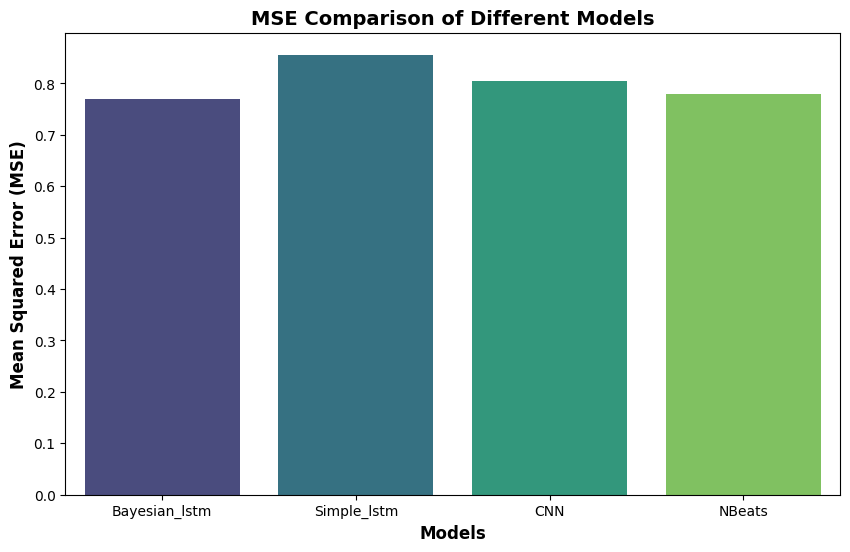

In [414]:
#plot a bar plot of the 4 mean squared errors
import seaborn as sns


# Sample MSE values (replace with your actual values)
mse_values = [bs_opt_lstm_mse, lstm_mse, cnn_mse, nb_model_mse]

# Model names
model_names = ['Bayesian_lstm', 'Simple_lstm', 'CNN', 'NBeats']

# Create a DataFrame from the data
df = pd.DataFrame({'Models': model_names, 'MSE': mse_values})

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
sns.barplot(x='Models', y='MSE', data=df, palette='viridis')  # 'viridis' is a colormap

# Add bold labels and title

plt.xlabel('Models', fontsize=12, fontweight = 'bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=12, fontweight = 'bold')
plt.title('MSE Comparison of Different Models', fontsize=14, fontweight = 'bold')

# Show the plot
plt.show()



### Compare the 4 models' Validation Loss curves

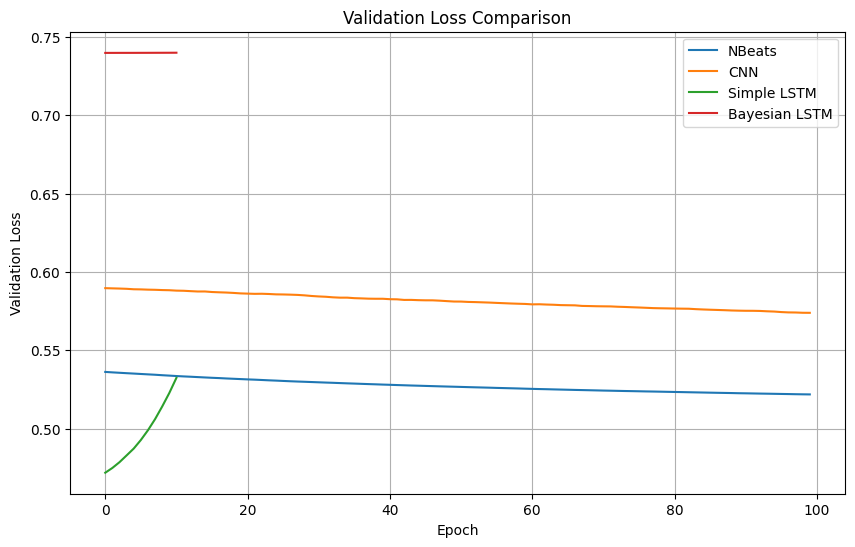

In [418]:
# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size

plt.plot(hist_nb.history['val_loss'], label='NBeats')
plt.plot(hist_cnn.history['val_loss'], label='CNN')
plt.plot(lstm_history.history['val_loss'], label='Simple LSTM')
plt.plot(bs_opt_lstm_hist.history['val_loss'], label='Bayesian LSTM')

plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()  # Show the legend

plt.grid(True)  # Optional: Add gridlines
plt.show()